In [239]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, \
recall_score, f1_score, log_loss, confusion_matrix, \
    classification_report, roc_curve, auc, precision_recall_curve

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, \
StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet,\
RidgeClassifier, LogisticRegressionCV



import warnings
warnings.filterwarnings("ignore");

RAND = 10

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [240]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, \
StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet,\
RidgeClassifier, LogisticRegressionCV

from sklearn.metrics import  f1_score, accuracy_score, \
roc_auc_score, classification_report, r2_score, precision_score, recall_score, \
log_loss, mean_squared_log_error

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, BaggingRegressor, \
    RandomForestRegressor



import warnings
warnings.filterwarnings("ignore");

RAND = 10

In [241]:
from sklearn import datasets, model_selection
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

print("All imports work ✅")


All imports work ✅


In [242]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [244]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [245]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# EDA

## Target - churn

In [8]:
df['Churn'].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [9]:
def plot_text(ax: plt.Axes):
    """
    text on barplot
    """
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # text
            # coordinate xy
            (p.get_x() + p.get_width() / 2., p.get_height()),
            # center
            ha='center',
            va='center',
            xytext=(0, 10),
            # offset point
            textcoords='offset points',
            fontsize=14)
        
        


In [10]:
# normalization
norm_target = (df['Churn'].value_counts(
    normalize=True).mul(100).rename('percent').reset_index().rename(columns={'index': 'Churn'}))

In [11]:
norm_target.head()

,Churn,percent
0,No,73.463013
1,Yes,26.536987


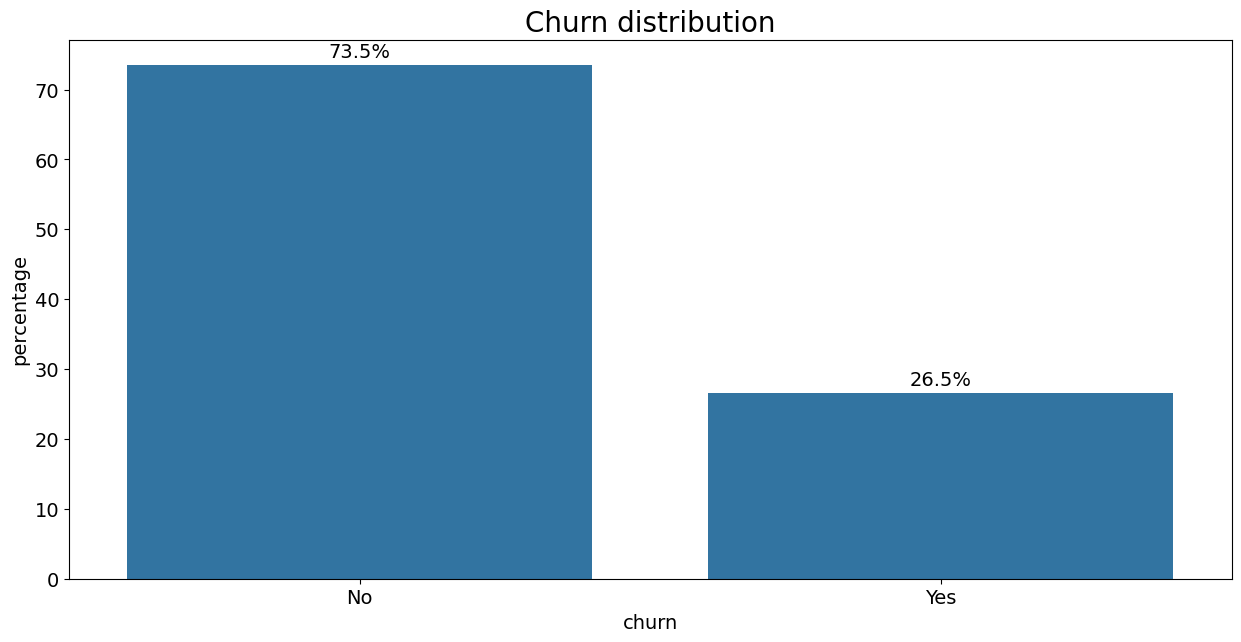

In [12]:

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='Churn', y='percent', data=norm_target)

# Displaying values above the bars – annotate()
# Loop through each bar in the chart and mark its value
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(
        percentage,

        (p.get_x() + p.get_width() / 2., p.get_height()),
        # центрирование
        ha='center',
        va='center',
        xytext=(0, 10),

        textcoords='offset points',
        fontsize=14)

plt.title('Churn distribution', fontsize=20)
plt.xlabel('churn', fontsize=14)
plt.ylabel('percentage', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Hypothesis for EDA

1. Customer profile

New customers in their first 6 months have a higher churn risk compared to long-term customers

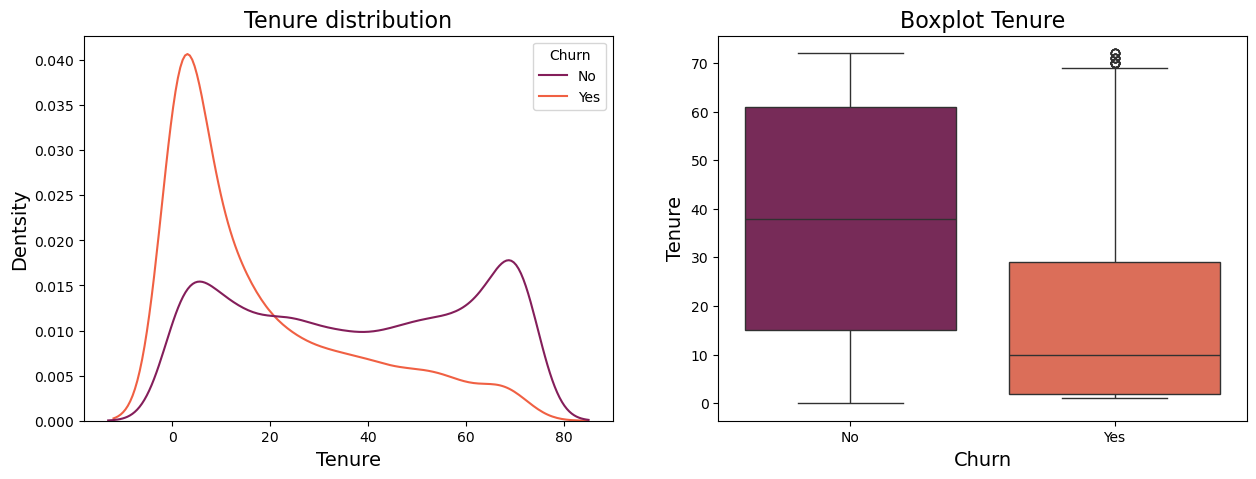

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(
    data=df,
    x='tenure',
    hue='Churn',
    common_norm=False,
    palette='rocket',
    ax=axes[0])

axes[0].set_title('Tenure distribution', fontsize=16)
axes[0].set_xlabel('Tenure', fontsize=14)
axes[0].set_ylabel('Dentsity', fontsize=14)

sns.boxplot(x='Churn', y='tenure', data=df, palette='rocket', ax=axes[1])

axes[1].set_title('Boxplot Tenure', fontsize=16)
axes[1].set_ylabel('Tenure', fontsize=14)
axes[1].set_xlabel('Churn', fontsize=14)
plt.show()

1. Early Tenure Customers Have Higher Churn Risk

The orange curve (Churn = Yes) has a very sharp peak near 0–3 months.

This means many customers who leave (churn) tend to do so within their first few months.

In contrast, the purple curve (Churn = No) rises more gradually in the early months, showing that customers who stay longer don’t drop off as quickly at the start.

👉 Interpretation: New customers are at the highest risk of churn. If you don’t engage them well in the first 3 months, they are much more likely to leave.

2. Long-Term Customers Are More Likely to Stay

Notice how the purple curve (No churn) has peaks around 20–30 months and again around 60–70 months.

Meanwhile, the orange curve flattens out significantly as tenure increases.

👉 Interpretation: Once customers pass the initial risky period, they’re much more likely to stay subscribed long-term.

3. Churn Distribution is Front-Loaded

Most of the density of the churned customers (orange) is concentrated at low tenure values.

The density of non-churned customers (purple) spreads across the whole tenure range, especially toward the higher values.

👉 Interpretation: Churn is not random — it strongly correlates with customer lifecycle stage. Early tenure is the danger zone.

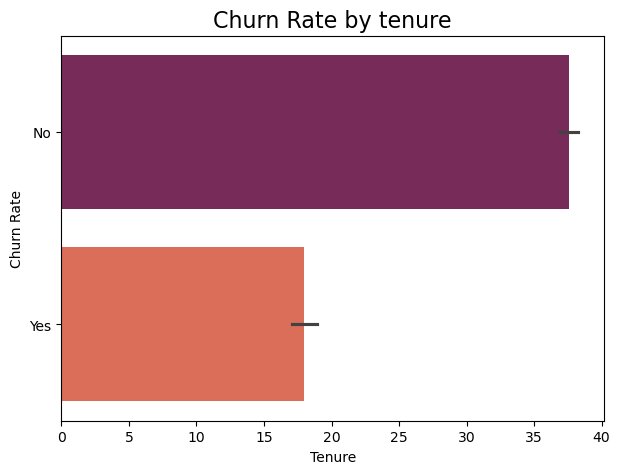

In [14]:
plt.figure(figsize=(7,5))
sns.barplot(x='tenure', y='Churn', data=df, palette='rocket')
plt.title('Churn Rate by tenure', fontsize=16)
plt.ylabel('Churn Rate')
plt.xlabel('Tenure')
plt.show()

* This shows us that new customers churn more often

In [15]:
!pip install lifelines

In [16]:
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [17]:
df['Churn_numeric'].value_counts(normalize=True)

Churn_numeric
0    0.73463
1    0.26537
Name: proportion, dtype: float64

2. Payment & Plan Factors
 * Customers on monthly plans churn more often than annual subscribers.

In [18]:
def barplot_group_by_category(df_data: pd.DataFrame, col_main: str, col_group: str,
                  title: str) -> None:
    """
    build barplot with normalized data and graph data annotations
    
    highligting target variable by variable
    """

    plt.figure(figsize=(15, 6))

    data = (df_data.groupby([col_main])[col_group].value_counts(normalize=True).rename(
            'percentage').mul(100).reset_index().sort_values(col_main))

    ax = sns.barplot(x=col_main,
                     y="percentage",
                     hue=col_group,
                     data=data,
                     palette='rocket')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 7),
            textcoords='offset points',
            fontsize=12)

    plt.title(title, fontsize=16)
    plt.ylabel('Percentage', fontsize=14)
    plt.xlabel(col_main, fontsize=14)
    plt.show()

In [19]:
def barplot_group_within_targetvar(df_data: pd.DataFrame, col_main: str, col_group: str,
                  title: str) -> None:
    """
    build barplot with normalized data and graph data annotations
    
    highligting proportion of variable within target group
    """

    plt.figure(figsize=(15, 6))

    data = (df_data.groupby([col_group])[col_main].value_counts(normalize=True).rename(
            'percentage').mul(100).reset_index().sort_values(col_group))

    ax = sns.barplot(x=col_main,
                     y="percentage",
                     hue=col_group,
                     data=data,
                     palette='rocket')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 7),
            textcoords='offset points',
            fontsize=12)

    plt.title(title, fontsize=16)
    plt.ylabel('Percentage', fontsize=14)
    plt.xlabel(col_main, fontsize=14)
    plt.show()

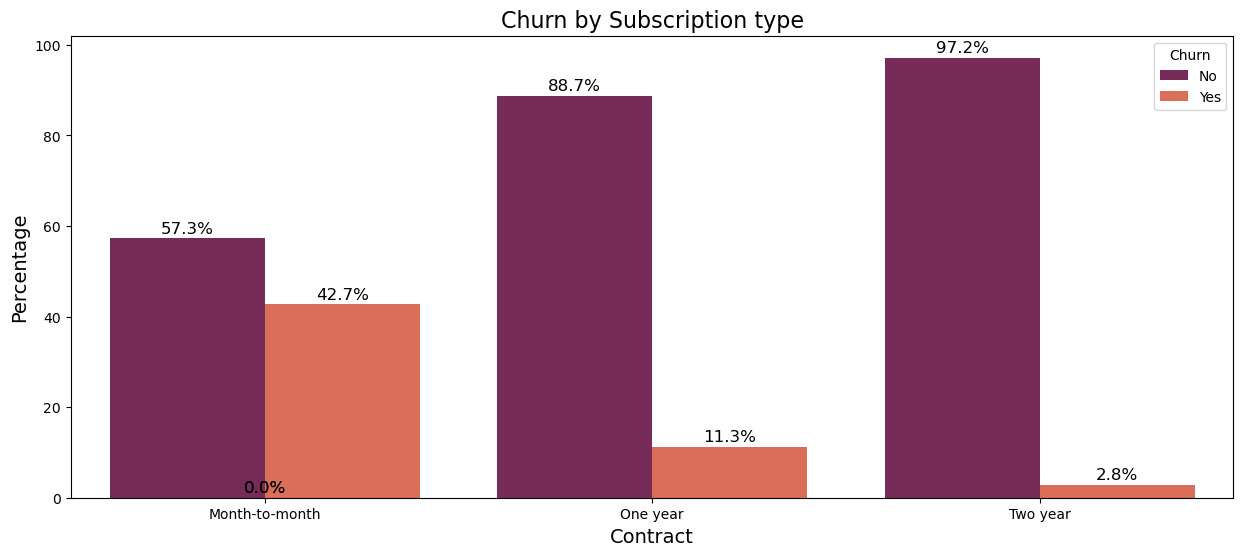

In [20]:
barplot_group_by_category(df, 'Contract','Churn', 'Churn by Subscription type')

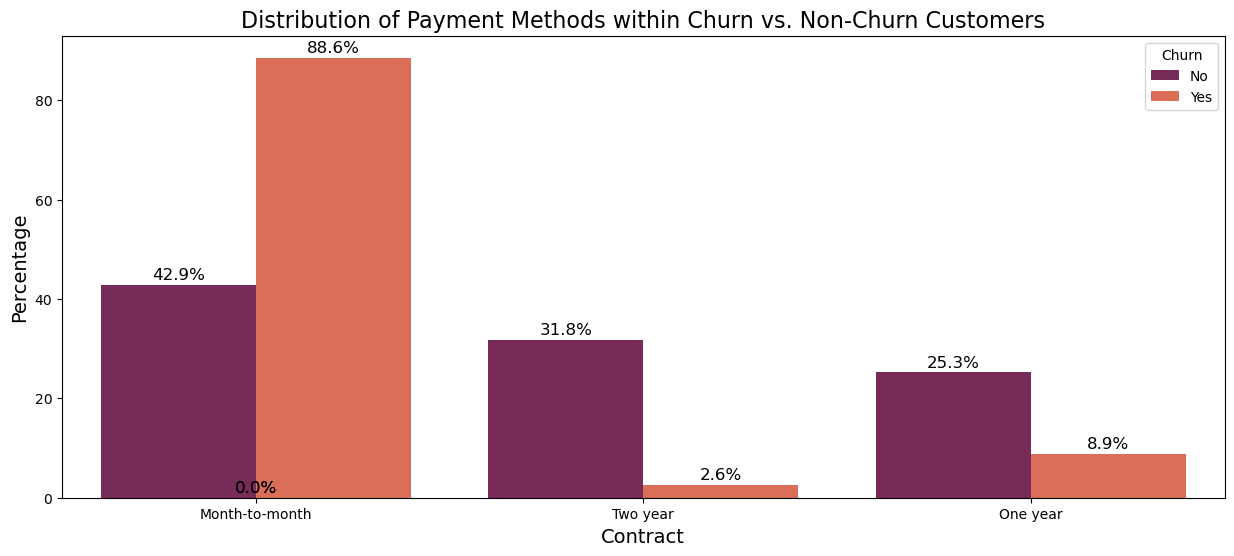

In [21]:
barplot_group_within_targetvar(df, 'Contract','Churn', 'Distribution of Payment Methods within Churn vs. Non-Churn Customers')

* the plot confirms that people on a monthly subscription type churn more often that those who have annual subscription

* Longer contracts significantly reduce churn. Customers commit and are less likely to switch to competitors.

* Month-to-month customers are the riskiest group and may require targeted retention strategies (loyalty perks, discounts, personalized offers).

* This insight is crucial for churn prediction models because contract type is a strong predictor of churn risk.

3. Support Availability
* Customers who do not have tech support are more likely to churn,since they might feel abandoned when they face technical issues 

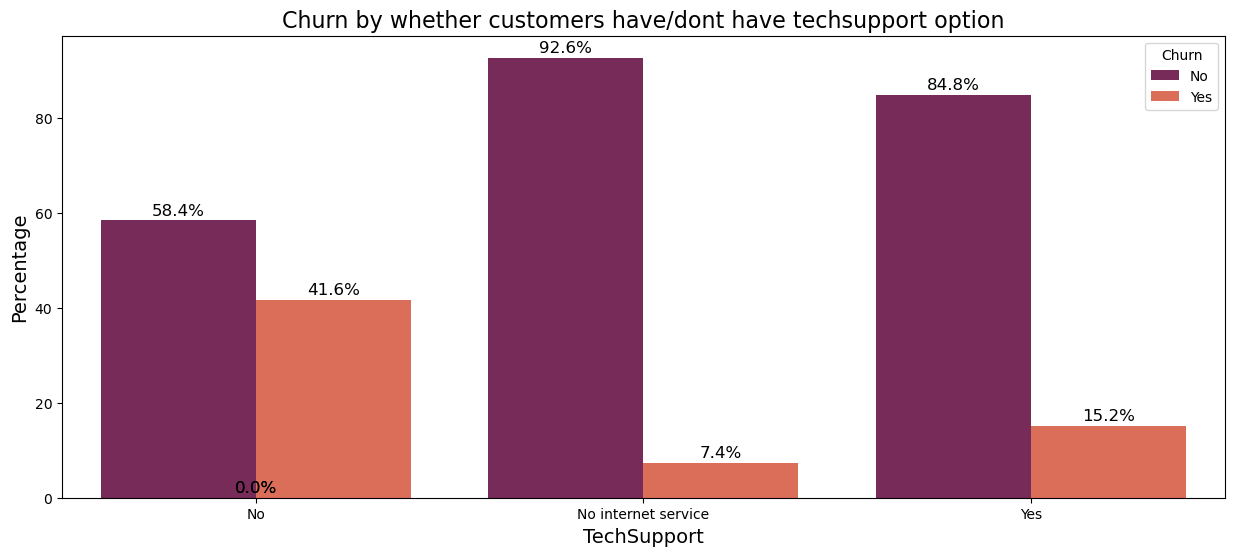

In [22]:
barplot_group_by_category(df, 'TechSupport', 'Churn','Churn by whether customers have/dont have techsupport option')

* the hypothesis is confirmed since the 77% of customers that have no techsupport option on their account have churned
* in comparison, clients with techsupport available are less likely to churn

4. Payment Method
* Customers paying automatically are less likely to churn because payments happen seamlessly. 
Forgetting to renew or missing a bill doesn’t cause involuntary churn.

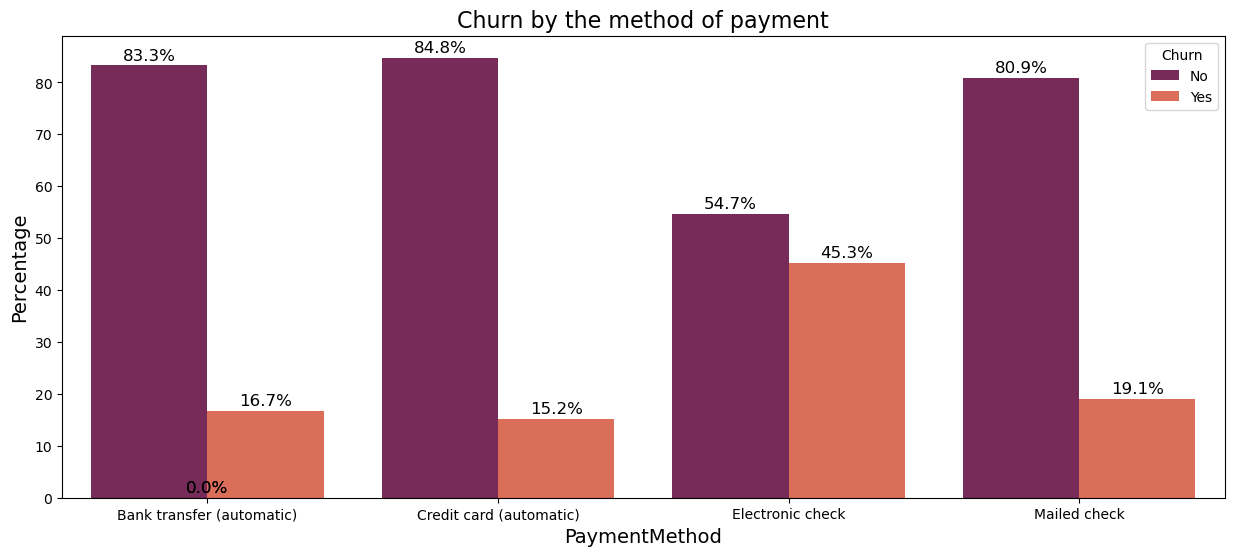

In [23]:
barplot_group_by_category(df, 'PaymentMethod','Churn', 'Churn by the method of payment')

* out of four payment methods, electronic check incurres higher churn rate

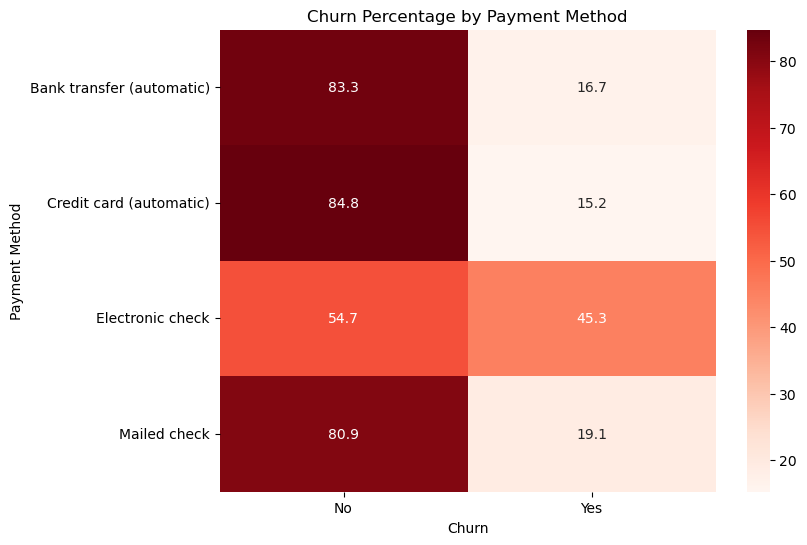

In [24]:

heatmap_data = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Reds")
plt.title("Churn Percentage by Payment Method")
plt.ylabel("Payment Method")
plt.xlabel("Churn")
plt.show()


## Correlation & Relationships

### numerical features

In [25]:
# df['TotalCharges'] = df['TotalCharges'].astype(float)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [26]:
print(df['TotalCharges'].to_list())

[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95, 587.45, 326.8, 5681.1, 5036.3, 2686.05, 7895.15, 1022.95, 7382.25, 528.35, 1862.9, 39.65, 202.25, 20.15, 3505.1, 2970.3, 1530.6, 4749.15, 30.2, 6369.45, 1093.1, 6766.95, 181.65, 1874.45, 20.2, 45.25, 7251.7, 316.9, 3548.3, 3549.25, 1105.4, 475.7, 4872.35, 418.25, 4861.45, 981.45, 3906.7, 97.0, 144.15, 4217.8, 4254.1, 3838.75, 1426.4, 1752.65, 633.3, 4456.35, 1752.55, 6311.2, 7076.35, 894.3, 7853.7, 4707.1, 5450.7, 2962.0, 957.1, 857.25, 244.1, 3650.35, 2497.2, 930.9, 887.35, 49.05, 1090.65, 7099.0, 1424.6, 177.4, 6139.5, 2688.85, 482.25, 2111.3, 1216.6, 79.35, 565.35, 496.9, 4327.5, 973.35, 918.75, 2215.45, 1057.0, 927.1, 1009.25, 2570.2, 74.7, 5714.25, 7107.0, 7459.05, 927.35, 4748.7, 113.85, 1107.2, 2514.5, 20.2, 19.45, 3605.6, 3027.25, 7611.85, 100.2, 7303.05, 927.65, 3921.3, 1363.25, 5238.9, 3042.25, 3954.1, 2868.15, 3423.5, 248.4, 1126.35, 1064.65, 835.15, 2151.6, 5515.45, 112.75, 229.55, 350.35, 62.9

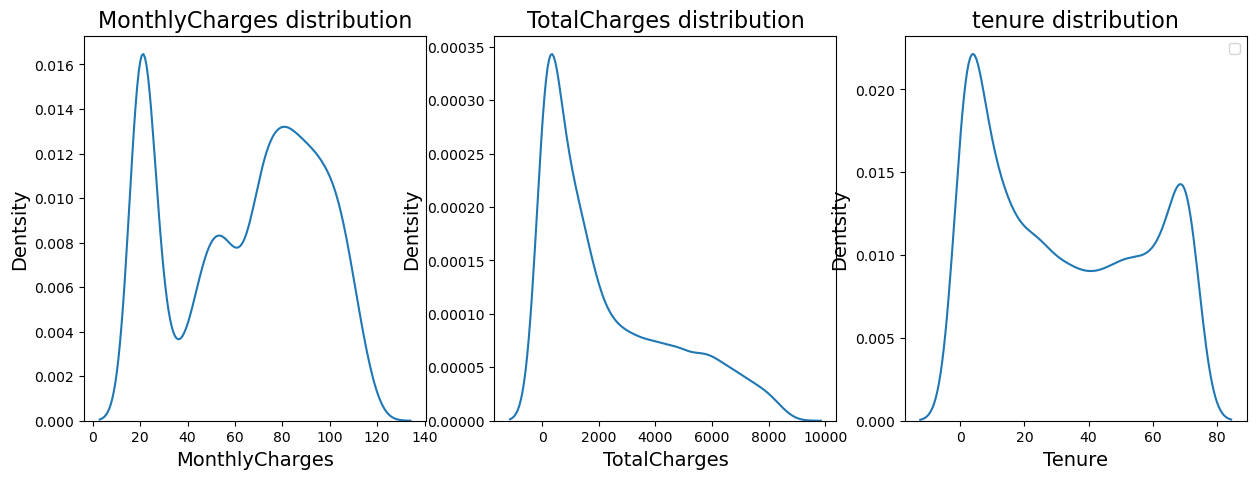

In [27]:


fig, axes = plt.subplots(ncols=3, figsize=(15, 5))


# KDE plot for Monthly Charges
sns.kdeplot(data=df, x='MonthlyCharges',common_norm=False, palette='rocket',ax=axes[0])

# KDE plot for Total Charges
sns.kdeplot(data=df, x='TotalCharges',common_norm=False, palette='rocket',ax=axes[1])

# KDE plot for Tenure
sns.kdeplot(data=df, x='tenure',common_norm=False, palette='rocket',ax=axes[2])

# Add title and labels

axes[0].set_title('MonthlyCharges distribution', fontsize=16)
axes[0].set_xlabel('MonthlyCharges', fontsize=14)
axes[0].set_ylabel('Dentsity', fontsize=14)

axes[1].set_title('TotalCharges distribution', fontsize=16)
axes[1].set_xlabel('TotalCharges', fontsize=14)
axes[1].set_ylabel('Dentsity', fontsize=14)

axes[2].set_title('tenure distribution', fontsize=16)
axes[2].set_xlabel('Tenure', fontsize=14)
axes[2].set_ylabel('Dentsity', fontsize=14)

# Show legend
plt.legend()

# Display the plot
plt.show()




* since all three variables are not normally distributed, use Spearman correlation coeficient test 

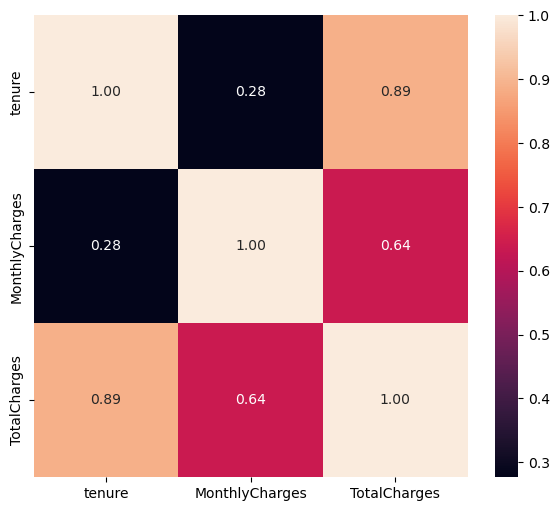

In [28]:

features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(7, 6))
sns.heatmap(df[features].corr(method='spearman'), annot=True, fmt='.2f');

* Tenure and Total Charges have strong positive correclation: the longer customers stay, the more charges they accumulate
* Monthly Charges and Total Charges moderate positive correlation: Customers paying more each month also tend to have higher total charges — but not perfectly (because total also depends on how long they’ve stayed)
* Tenure and Monthly Charges have weak positive correlation:Indicates that how long someone has been a customer is not strongly linked to how much they pay monthly.This makes sense: monthly charges are more about the plan type (basic vs. premium) than about tenure    

* Multicollinearity: Since Tenure and TotalCharges are highly correlated (0.89), using both in a regression or tree model may add redundancy. 
* We want to keep just one of them, or transform TotalCharges into something like average monthly spend (TotalCharges / Tenure).

In [29]:
# checking for multicollinearity - VIF (Variance Inflation Factor)
# tells you how much the variance of a regression coefficient is inflated due to multicollinearity




def compute_vif(df):
    vif_data = []
    X = df.dropna()
    for i in range(X.shape[1]):
        y = X.iloc[:, i]
        X_other = X.drop(X.columns[i], axis=1)
        
        model = LinearRegression().fit(X_other, y)
        r2 = model.score(X_other, y)
        vif = 1 / (1 - r2) if r2 < 1 else float('inf')
        
        vif_data.append({'Variable': X.columns[i], 'VIF': vif})
    
    return pd.DataFrame(vif_data)

print(compute_vif(df[['tenure','MonthlyCharges','TotalCharges']]))


         Variable       VIF
0          tenure  5.844646
1  MonthlyCharges  3.225293
2    TotalCharges  9.526697


* VIF>5 indicates high multicollinearity and we should consider removing or transforming variables (TotalCharges in this case)

In [30]:
# create new variable Average Monthly Spend (Feature Engineering)

df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'].replace(0, 1))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric,AvgMonthlySpend
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,55.573529
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,54.075000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,40.905556
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,75.825000


### categorical features

* use association measures like Chi-square test and Cramér’s V
* Chi-square test Tests if two categorical variables are statistically independent
* Cramér’s V Measures the strength of association between two categorical variables

In [31]:
# # Chi-square test of independence

# import pandas as pd
# import scipy.stats as stats

# # Example: Churn vs. ContractType
# contingency_table = pd.crosstab(df['Churn'], df['Contract'])

# chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# print("Chi-square test result:")
# print(f"Chi2={chi2:.2f}, p={p:.4f}, dof={dof}")


In [32]:
# chi-square test and Cramer's V functions for categorical variables association

def cramers_v(confusion_matrix):
    """Compute Cramér's V (strength of association) from a confusion matrix."""
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


def categorical_assoc_with_churn(df, churn_col='Churn'):
    """
    For each categorical feature in df (excluding churn_col),
    run Chi-square test + Cramér's V against churn.
    """
    results = []

    # Loop over categorical columns
    for col in df.select_dtypes(include=['object', 'category']).columns:
        if col == churn_col:
            continue  # skip target

        contingency_table = pd.crosstab(df[churn_col], df[col])
        
        # Chi-square
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        
        # Cramer's V
        cv = cramers_v(contingency_table)
        
        results.append({
            'Feature': col,
            'Chi2': chi2,
            'p_value': p,
            'Cramers_V': cv
        })
    
    return pd.DataFrame(results).sort_values('Cramers_V', ascending=False)


In [33]:
assoc_results=categorical_assoc_with_churn(df,churn_col='Churn' )
print(assoc_results)

             Feature         Chi2        p_value  Cramers_V
13          Contract  1184.596572  5.863038e-258   0.409798
7     OnlineSecurity   849.998968  2.661150e-185   0.347016
10       TechSupport   828.197068  1.443084e-180   0.342526
6    InternetService   732.309590  9.571788e-160   0.322037
15     PaymentMethod   648.142327  3.682355e-140   0.302677
8       OnlineBackup   601.812790  2.079759e-131   0.291850
9   DeviceProtection   558.419369  5.505219e-122   0.281095
12   StreamingMovies   375.661479   2.667757e-82   0.230351
11       StreamingTV   374.203943   5.528994e-82   0.229902
14  PaperlessBilling   258.277649   4.073355e-58   0.191141
3         Dependents   189.129249   4.924922e-43   0.163448
2            Partner   158.733382   2.139911e-36   0.149663
5      MultipleLines    11.330441   3.464383e-03   0.036400
1             gender     0.484083   4.865787e-01   0.000000
4       PhoneService     0.915033   3.387825e-01   0.000000
0         customerID  7043.000000   4.94

Interpretation:
* p-value < 0.05 → feature is significantly associated with churn.

Cramér’s V tells you the strength:

* <0.10 → very weak

* 0.10–0.30 → weak

* 0.30–0.50 → moderate

* 0.50 → strong

* all features except for customerId, gender and PhoneService are strongly associated with churn
* according to Cramer's V Contract,OnlineSecurity,TechSupport,  InternetService, PaymentMethod and OnlineBackup have moderately strong relationship with Churn rate 

In [34]:
# convert categorical variables to build the model

df_label = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)

In [35]:
df_label.isna().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
Churn_numeric                             0
AvgMonthlySpend                          11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

In [36]:
df_l=df_label.fillna(0)

In [37]:
df_l.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn_numeric                            0
AvgMonthlySpend                          0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [38]:
df_label_final = df_l.astype(int)

In [39]:
df_label_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_numeric,AvgMonthlySpend,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29,29,0,29,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56,1889,0,55,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53,108,1,54,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42,1840,0,40,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70,151,1,75,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [40]:
df_label_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   SeniorCitizen                          7043 non-null   int64
 1   tenure                                 7043 non-null   int64
 2   MonthlyCharges                         7043 non-null   int64
 3   TotalCharges                           7043 non-null   int64
 4   Churn_numeric                          7043 non-null   int64
 5   AvgMonthlySpend                        7043 non-null   int64
 6   gender_Male                            7043 non-null   int64
 7   Partner_Yes                            7043 non-null   int64
 8   Dependents_Yes                         7043 non-null   int64
 9   PhoneService_Yes                       7043 non-null   int64
 10  MultipleLines_No phone service         7043 non-null   int64
 11  MultipleLines_Yes             

# SplitTrain/Test

In [41]:
# It is essential in classification tasks, 
# and especially when dealing with class imbalance, 
# to use the stratify parameter, 
# since it preserves the original class proportions in the train/test split


X = df_label_final.drop(['Churn_numeric','Churn_Yes','TotalCharges'], axis=1)
y = df_label['Churn_numeric']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RAND)

# Baseline + Model

## Baseline - Logistic Regression

In [42]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# train Logistic Regression

lr=LogisticRegression(random_state=RAND)
lr.fit(X_train_std, y_train)

# get predicted class metrics
# predict the class labels (e.g., 0 or 1) 
# for your test dataset (X_test)
y_pred=lr.predict(X_test_std)

# get predicted probabilities
# returns the probability estimates for each class
y_score=lr.predict_proba(X_test_std)

* use y_pred when you want to compute metrics like: Accuracy,Precision, Recall, F1-score,Confusion Matrix
* y_score when you want to compute metrics that need probabilities, like:ROC curve, AUC, Log loss, Setting a custom probability threshold (instead of the default 0.5).

In [110]:



def r2_adjusted(y_true: np.ndarray, y_pred: np.ndarray,
                X_test: np.ndarray) -> float:

    N_objects = len(y_true)
    N_features = X_test.shape[1]
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (N_objects - 1) / (N_objects - N_features - 1)


def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Mean percentage error"""
    return np.mean((y_true - y_pred) / y_true) * 100


def mape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Mean absolute percentage error"""
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


def wape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Weighted Absolute Percent Error"""
    return np.sum(np.abs(y_pred - y_true)) / np.sum(y_true) * 100


def huber_loss(y_true: np.ndarray, y_pred: np.ndarray, delta: float = 1.345):
    """Huber loss fucntion"""
    assert len(y_true) == len(y_pred), 'difference size of data'
    huber_sum = 0
    for i in range(len(y_true)):
        if abs(y_true[i] - y_pred[i]) <= delta:
            huber_sum += 0.5 * (y_true[i] - y_pred[i])**2
        else:
            huber_sum += delta * (abs(y_true[i] - y_pred[i]) - 0.5 * delta)
    huber_sum /= len(y_true)
    return huber_sum


def logcosh(y_true: np.ndarray, y_pred: np.ndarray):
    """Log-Cosh loss function"""
    return np.sum(np.log(np.cosh(y_true - y_pred)))


def rmsle(y_true: np.ndarray, y_pred: np.ndarray) -> np.float64:
    """
    The Root Mean Squared Log Error (RMSLE) metric
    """
    try:
        return np.sqrt(mean_squared_log_error(y_true, y_pred))
    except:
        return None


def get_metrics_regression(y_test: np.ndarray,
                           y_pred: np.ndarray,
                           X_test: np.ndarray,
                           name: str = None,
                           delta: float = 1.345):
    """generate table with metrics for regression problem"""
    df_metrics = pd.DataFrame()

    df_metrics['model'] = [name]

    df_metrics['MAE'] = mean_absolute_error(y_test, y_pred)
    df_metrics['MSE'] = mean_squared_error(y_test, y_pred)
    df_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
    df_metrics['RMSLE'] = rmsle(y_test, y_pred)
    df_metrics['R2 adjusted'] = r2_adjusted(y_test, y_pred, X_test)
    # df_metrics['Huber_loss'] = huber_loss(y_test, y_pred, delta)
    # df_metrics['Logcosh'] = logcosh(y_test, y_pred)
    df_metrics['MPE_%'] = mpe(y_test, y_pred)
    df_metrics['MAPE_%'] = mape(y_test, y_pred)
    df_metrics['WAPE_%'] = wape(y_test, y_pred)

    return df_metrics


def get_metrics_classification(y_test, y_pred, y_score, name):
    """generate table with metrics for classification problem"""
    df_metrics = pd.DataFrame()

    df_metrics['model'] = [name]
    df_metrics['Accuracy'] = accuracy_score(y_test, y_pred)
    df_metrics['ROC_AUC'] = roc_auc_score(y_test, y_score) #[:, 1])
    df_metrics['Precision'] = precision_score(y_test, y_pred)
    df_metrics['Recall'] = recall_score(y_test, y_pred)
    df_metrics['f1'] = f1_score(y_test, y_pred)
    df_metrics['Logloss'] = log_loss(y_test, y_score)

    return df_metrics

In [44]:
metrics = get_metrics_classification(y_test, y_pred, y_score, name='Baseline')
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692



🔹 1. **Accuracy = 0.789 (≈ 79%)**

* Almost **4 out of 5 predictions** were correct overall.
* Looks good at first glance, but accuracy alone can be misleading — especially if your dataset is imbalanced (e.g., many more "No Churn" than "Churn").

---

🔹 2. **ROC\_AUC = 0.837**

* Very strong — this means your model has **83.7% probability** of ranking a positive case (e.g., fraud or churn = 1) higher than a negative case.
* AUC > 0.8 is generally considered a **good classifier**.

---

🔹 3. **Precision = 0.622 (≈ 62%)**

* Out of all the cases the model predicted as positive (class 1), only **62% were actually correct**.
* This means you still have **false positives** (the model sometimes flags cases as positive incorrectly).
* Important if false positives are costly (e.g., wrongly flagging a legit claim as fraud).

---

🔹 4. **Recall = 0.519 (≈ 52%)**

* Out of all the actual positive cases, the model caught only **about half (52%)**.
* So the model is **missing many true positives**.
* Important if false negatives are costly (e.g., missing fraud or churn cases).

---

🔹 5. **F1 Score = 0.566**

* Harmonic mean of Precision and Recall.
* At **56.5%**, it shows a balance between Precision and Recall, but not very strong.
* Suggests the model struggles to **consistently identify positives**.

---

🔹 6. **Log Loss = 0.426**

* Measures how well predicted **probabilities** match the true labels.
* Lower is better; 0.42 is **moderately good**. It means probabilities are reasonably calibrated, but could be sharper.

---

✅ Overall Interpretation

* logistic regression **baseline model is decent**:

  * Strong ROC\_AUC (0.83) → the model has good ranking ability.
  * Accuracy is fair (0.79).
  * Weakness:

  * **Recall is low (0.52)** → the model misses many true positive cases.
  * Precision is decent (0.62) → when it predicts positive, it’s right most of the time.

* Suggestion:

  * try **class rebalancing techniques** (SMOTE, class weights).
  * Experiment with **different thresholds** (instead of 0.5).
  * Explore **regularization (L1/L2), feature engineering, or ensemble models** to improve Recall without hurting Precision too much.





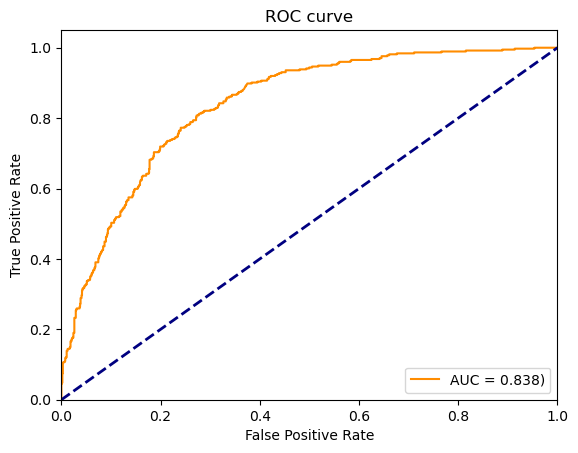

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

# auc - Compute Area Under the Curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')
# const algorithm - line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# scale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# legend location
plt.legend(loc="lower right")
plt.show()

### class weight

In [46]:


lrw = LogisticRegression(class_weight='balanced', random_state=RAND)
lrw.fit(X_train_std, y_train)

y_pred = lrw.predict(X_test_std)
y_score = lrw.predict_proba(X_test_std)

metrics = pd.concat(
    [metrics,
     get_metrics_classification(y_test, y_pred, y_score, name='ClassWeight')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368


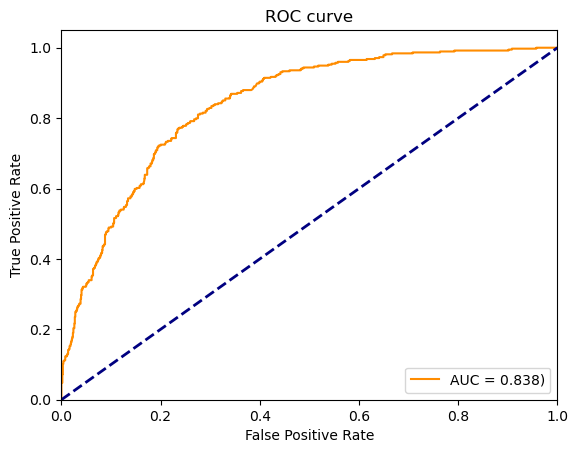

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[: , 1])

# auc - Compute Area Under the Curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')
# const algorithms - line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# scale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# legend location
plt.legend(loc="lower right")
plt.show()



 🔹 Interpretation of the Metrics

 **1. Accuracy = 0.755**

* Lower than your baseline (\~0.789), but this is expected.
* With imbalanced datasets, **accuracy drops when recall improves**, because the model is focusing more on minority class.

---

 **2. ROC\_AUC = 0.838**

* Excellent (slightly better than baseline = 0.837).
* Model ranks positive vs. negative classes very well.

---

 **3. Precision = 0.526**

* About **53%** of the predicted positives are correct.
* Precision dropped compared to baseline (0.62), meaning more false positives.

---

 **4. Recall = 0.783**

* Huge improvement!
* Baseline recall was 0.52, now it’s 0.78 — the model is catching **many more true positives** (great for churn or fraud detection).

---

 **5. F1 = 0.629**

* Balance of Precision and Recall.
* Higher than baseline (0.566 → 0.629), meaning overall better trade-off.

---

 **6. Log Loss = 0.500**

* Slightly worse than baseline (0.426 → 0.500).
* This means probability calibration worsened a bit — the model is more aggressive in predicting positives.

---

 ✅ Overall Summary

* **Class weights shifted the balance**:

  * Accuracy and Precision ↓
  * Recall and F1 ↑
  * This is exactly what you want if **catching positives is more important than avoiding false alarms** (e.g., better to flag a potential churner/fraud than to miss them).
  * Trade-off: you’re finding more positives, but also making more false alarms.



### SMOTE

In [48]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
import imblearn
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(k_neighbors=3,random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_std, y_train)

In [51]:
y_smote.value_counts()

Churn_numeric
1    4139
0    4139
Name: count, dtype: int64

In [52]:
y_smote.value_counts()

Churn_numeric
1    4139
0    4139
Name: count, dtype: int64

In [53]:
pd.Series(y_smote).value_counts()

Churn_numeric
1    4139
0    4139
Name: count, dtype: int64

In [54]:
y_train.value_counts()

Churn_numeric
0    4139
1    1495
Name: count, dtype: int64

In [55]:
lr_smote = LogisticRegression(random_state=RAND)
lr_smote.fit(X_smote, y_smote)

y_pred = lr_smote.predict(X_test_std)
y_score = lr_smote.predict_proba(X_test_std)

metrics = pd.concat([metrics, get_metrics_classification(y_test, y_pred, y_score, name='SMOTE')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368
0,SMOTE,0.757984,0.836740,0.530841,0.759358,0.624862,0.496606


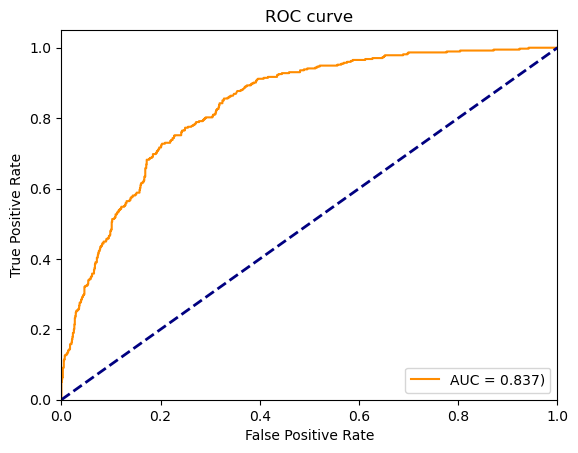

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[: , 1])

# auc - Compute Area Under the Curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')
# const algorithms - line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# scale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# legend location
plt.legend(loc="lower right")
plt.show()


 🔹 Metric-by-Metric Interpretation

 **1. Accuracy = 0.757**

* About the same as with class weighting (0.755).
* Lower than the baseline (0.789), which is expected — balancing data sacrifices some accuracy to better handle the minority class.

---

 **2. ROC\_AUC = 0.815**

* Slightly **lower than class weights (0.838)** but still good (>0.8).
* Suggests the model’s ability to separate classes is still strong.

---

 **3. Precision = 0.532**

* Very similar to class weighting (0.526).
* This means **just over half of predicted positives are true positives**.

---

 **4. Recall = 0.698**

* Lower than class weighting (0.783) but much higher than baseline (0.519).
* SMOTE improved recall significantly compared to baseline, but **not as much as class weights did**.

---

 **5. F1 = 0.603**

* Better than baseline (0.566), but slightly worse than class weights (0.629).
* Shows a balanced improvement, but class weights still performed better overall.

---

 **6. Log Loss = 0.492**

* Higher (worse) than baseline (0.426) but similar to class weights (0.500).
* Indicates probability estimates are less well-calibrated after resampling.

---

 ✅ Overall Summary

* **Baseline** → high accuracy, but recall too low.
* **Class Weights** → best recall (0.783) and highest F1 (0.629).
* **SMOTE** → improves recall (0.698) and F1 (0.603), but not as strong as class weights.

📌 **Takeaway:**
For your dataset, **class weighting outperforms SMOTE** in terms of balancing Precision, Recall, and F1. SMOTE is still useful, but class weights seem to fit your data better.



### Regularization

#### Ridge

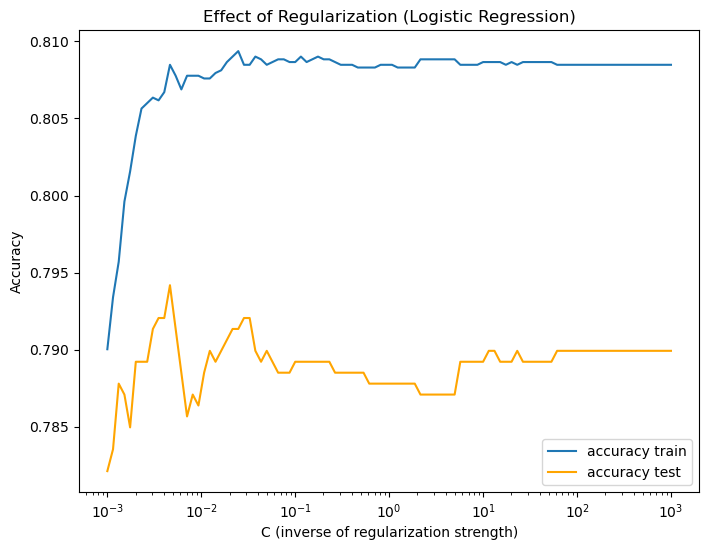

In [57]:

n_C = 100
# log for regularization coeficient
C_values = np.logspace(-3, 3, n_C)

ridge_train = []
ridge_test = []

for C in C_values:
    model_ridge = LogisticRegression(C=C,penalty='l2', solver="lbfgs", max_iter=5000)
    model_ridge.fit(X_train_std, y_train)
    
    # record accuracy score for train and test
    ridge_train.append(accuracy_score(y_train,
                                           model_ridge.predict(X_train_std)))
    ridge_test.append(accuracy_score(y_test, model_ridge.predict(X_test_std)))
   
 # plot the results 
fig = plt.figure(figsize=(8, 6))
plt.plot(C_values, ridge_train, label='accuracy train')
plt.plot(C_values, ridge_test, color='orange', label='accuracy test')
plt.xscale('log')  # log scale for C
plt.xlabel('C (inverse of regularization strength)')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.title("Effect of Regularization (Logistic Regression)")
plt.show()






In [58]:
# select max Accuracy score
C_new = C_values[ridge_test.index(max(ridge_test))]
C_new

0.004641588833612782

In [59]:

best_acc = max(ridge_test)
best_acc

0.794180269694819

In [60]:
model_ridge = LogisticRegression(C=C_new,penalty='l2', solver="lbfgs", max_iter=5000)
model_ridge.fit(X_train_std, y_train)

LogisticRegression(C=0.004641588833612782, max_iter=5000)

In [61]:
# get predicted class metrics
# predict the class labels (e.g., 0 or 1) 
# for your test dataset (X_test)
y_pred=model_ridge.predict(X_test_std)

# get predicted probabilities
# returns the probability estimates for each class
y_score=model_ridge.predict_proba(X_test_std)

In [62]:
metrics = pd.concat([metrics, get_metrics_classification(y_test, y_pred, y_score, name='Ridge model')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368
0,SMOTE,0.757984,0.836740,0.530841,0.759358,0.624862,0.496606
0,Ridge model,0.794180,0.839137,0.651079,0.483957,0.555215,0.425223


#### Lasso

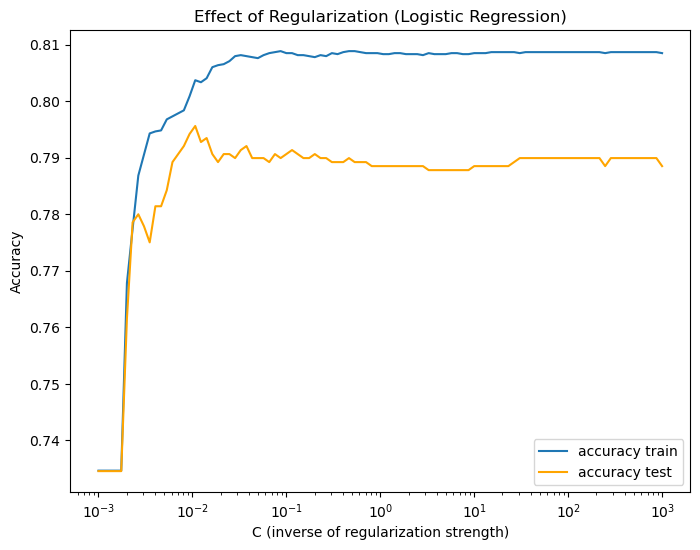

In [63]:
n_C = 100
# log range for regularization coeficient lambda
C_values = np.logspace(-3, 3, n_C)

lasso_train = []
lasso_test = []

for C in C_values:
    model_lasso = LogisticRegression(C=C,penalty='l1', solver="liblinear", max_iter=5000)
    model_lasso.fit(X_train_std, y_train)
    
    # record accuracy score for train and test
    lasso_train.append(accuracy_score(y_train,
                                           model_lasso.predict(X_train_std)))
    lasso_test.append(accuracy_score(y_test, model_lasso.predict(X_test_std)))
   
 # plot the results 
fig = plt.figure(figsize=(8, 6))
plt.plot(C_values, lasso_train, label='accuracy train')
plt.plot(C_values, lasso_test, color='orange', label='accuracy test')
plt.xscale('log')  # log scale for C
plt.xlabel('C (inverse of regularization strength)')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.title("Effect of Regularization (Logistic Regression)")
plt.show()


In [64]:
# select max Accuracy score
C_new = C_values[lasso_test.index(max(lasso_test))]
C_new

0.010722672220103232

In [65]:
best_acc = max(lasso_test)
best_acc

0.7955997161107168

In [66]:
model_lasso = LogisticRegression(C=C_new,penalty='l1', solver="saga", max_iter=5000)
model_lasso.fit(X_train_std, y_train)

LogisticRegression(C=0.010722672220103232, max_iter=5000, penalty='l1',
                   solver='saga')

In [67]:
# get predicted class metrics
# predict the class labels (e.g., 0 or 1) 
# for your test dataset (X_test)
y_pred=model_lasso.predict(X_test_std)

# get predicted probabilities
# returns the probability estimates for each class
y_score=model_lasso.predict_proba(X_test_std)

In [68]:
metrics = pd.concat([metrics, get_metrics_classification(y_test, y_pred, y_score, name='Lasso model')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368
0,SMOTE,0.757984,0.836740,0.530841,0.759358,0.624862,0.496606
0,Ridge model,0.794180,0.839137,0.651079,0.483957,0.555215,0.425223
0,Lasso model,0.794180,0.833714,0.673554,0.435829,0.529221,0.434049


#### Elastic Net

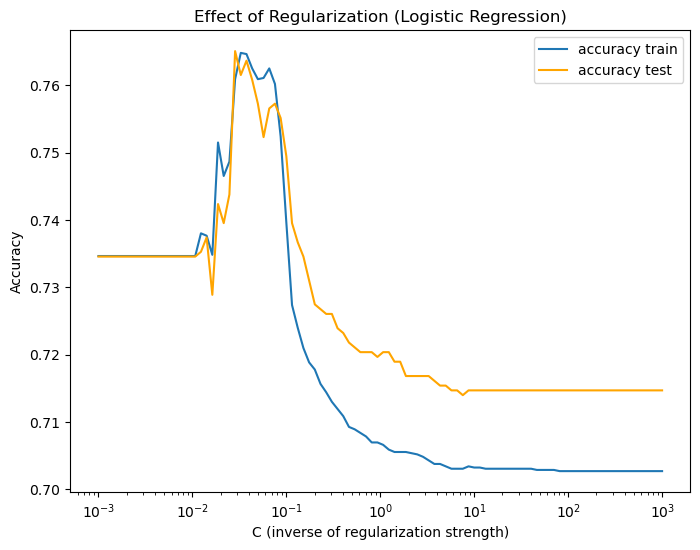

In [69]:
n_C = 100
# log range for regularization coeficient lambda
C_values = np.logspace(-3, 3, n_C)

elastic_train = []
elastic_test = []

for C in C_values:
    model_elastic = LogisticRegression(C=C,penalty='elasticnet', l1_ratio=0.5, solver="saga", max_iter=5000)
    model_elastic.fit(X_train, y_train)
    
    # record accuracy score for train and test
    elastic_train.append(accuracy_score(y_train,
                                           model_elastic.predict(X_train_std)))
    elastic_test.append(accuracy_score(y_test, model_elastic.predict(X_test_std)))
   
 # plot the results 
fig = plt.figure(figsize=(8, 6))
plt.plot(C_values, elastic_train, label='accuracy train')
plt.plot(C_values, elastic_test, color='orange', label='accuracy test')
plt.xscale('log')  # log scale for C
plt.xlabel('C (inverse of regularization strength)')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.title("Effect of Regularization (Logistic Regression)")
plt.show()

In [70]:
# select max Accuracy score
C_new = C_values[elastic_test.index(max(elastic_test))]
C_new

0.02848035868435802

In [71]:
best_acc = max(elastic_test)
best_acc

0.7650816181689141

In [72]:
model_elastic = LogisticRegression(C=C_new,penalty='elasticnet',l1_ratio=0.5, solver="saga", max_iter=5000)
model_elastic.fit(X_train_std, y_train)

LogisticRegression(C=0.02848035868435802, l1_ratio=0.5, max_iter=5000,
                   penalty='elasticnet', solver='saga')

In [73]:
# get predicted class metrics
# predict the class labels (e.g., 0 or 1) 
# for your test dataset (X_test)
y_pred=model_elastic.predict(X_test_std)

# get predicted probabilities
# returns the probability estimates for each class
y_score=model_elastic.predict_proba(X_test_std)

In [74]:
metrics = pd.concat([metrics, get_metrics_classification(y_test, y_pred, y_score, name='Elastic net model')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368
0,SMOTE,0.757984,0.836740,0.530841,0.759358,0.624862,0.496606
0,Ridge model,0.794180,0.839137,0.651079,0.483957,0.555215,0.425223
0,Lasso model,0.794180,0.833714,0.673554,0.435829,0.529221,0.434049
0,Elastic net model,0.791341,0.838220,0.633333,0.508021,0.563798,0.424424


Since the goal is to detect churners in an imbalanced dataset, the ClassWeight model is the best fit.
It sacrifices some accuracy (because the dataset is skewed),
but gains much higher recall and F1, meaning it catches most churners without being overwhelmed by false alarms.
Adding class_weight='balanced' in scikit-learn forces the model to pay more attention to the minority class (churners).

In [75]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
import numpy as np

class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    """
    Wraps a probabilistic classifier and applies a custom decision threshold.
    """
    def __init__(self, base_estimator, threshold=0.5):
        self.base_estimator = base_estimator
        self.threshold = threshold

    def fit(self, X, y):
        self.clf_ = clone(self.base_estimator)
        self.clf_.fit(X, y)
        return self

    def predict_proba(self, X):
        return self.clf_.predict_proba(X)

    def decision_function(self, X):
        # a convenient score = P(y=1)
        return self.predict_proba(X)[:, 1]

    def predict(self, X):
        proba_pos = self.predict_proba(X)[:, 1]
        return (proba_pos >= self.threshold).astype(int)

    def get_params(self, deep=True):
        return {"base_estimator": self.base_estimator, "threshold": self.threshold}

    def set_params(self, **params):
        for k, v in params.items():
            setattr(self, k, v)
        return self


### Model with lower threshold

using threshold wrapper

In [76]:


base = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=2000)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", ThresholdClassifier(base_estimator=base, threshold=0.5)),
])

param_grid = {
    "clf__threshold": [0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50],
    # you can also tune C, l1_ratio, etc. via "clf__base_estimator__C": [...]
}

# choose a scorer aligned with your goal (e.g., maximize F1 or recall)
grid = GridSearchCV(pipe, param_grid, scoring=make_scorer(f1_score), cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best threshold:", grid.best_params_["clf__threshold"])
y_pred = grid.predict(X_test)   # uses the tuned threshold automatically
y_score=grid.predict_proba(X_test)

Best threshold: 0.5


In [77]:
# Second split: take part of train as validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.25, stratify=y_train, random_state=42
)

In [78]:

proba = grid.best_estimator_.named_steps['clf'].predict_proba(X_valid)[:, 1]
precision, recall, thr = precision_recall_curve(y_valid, proba)
target_recall = 0.85
t = thr[np.argmin(np.abs(recall[:-1] - target_recall))]
grid.best_estimator_.named_steps['clf'].threshold = float(t)


In [79]:
# After setting best threshold:
print("Chosen threshold:", grid.best_estimator_.named_steps['clf'].threshold)


Chosen threshold: 8.824078778127856e-22


this threshold doesnt feel right

### GridSearch

In [80]:

# clf = LogisticRegression(class_weight='balanced', random_state=RAND)
# clf.fit(X_train_std, y_train)

# y_prob = clf.predict_proba(X_test_std)
# y_pred = clf.predict(X_test_std)

In [81]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-2, 3, num=3),
    'solver': ['liblinear', 'saga', 'lbfgs', 'sag'],
    'class_weight': ['balanced'],
    'random_state': [RAND]
}

lr = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RAND)

grid_cv = GridSearchCV(lr,
                       parameters_grid,
                       scoring='recall',
                       cv=cv,
                       verbose=1)

In [82]:
grid_cv.fit(X_smote, y_smote)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 3.16227766e+00, 1.00000000e+03]),
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [10],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'sag']},
             scoring='recall', verbose=1)

In [83]:
grid_cv.best_params_

{'C': 0.01,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'random_state': 10,
 'solver': 'liblinear'}

In [84]:
grid_cv.best_score_

0.8219383254765201

In [85]:
y_prob = grid_cv.predict_proba(X_test_std)
y_pred = grid_cv.predict(X_test_std)

metrics = pd.concat([metrics, get_metrics_classification(y_test, y_pred, y_score, name='GridSearch')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368
0,SMOTE,0.757984,0.836740,0.530841,0.759358,0.624862,0.496606
0,Ridge model,0.794180,0.839137,0.651079,0.483957,0.555215,0.425223
0,Lasso model,0.794180,0.833714,0.673554,0.435829,0.529221,0.434049
0,Elastic net model,0.791341,0.838220,0.633333,0.508021,0.563798,0.424424
0,GridSearch,0.749468,0.838434,0.518519,0.786096,0.624867,0.499483


In [86]:
parameters_grid = {
    'penalty': ['l2','l1', 'elasticnet', 'none'],
    'C': np.logspace(-2, 3, num=3),
    'solver': ['liblinear', 'saga', 'lbfgs', 'sag'],
    'class_weight': ['balanced'],
    'random_state': [RAND]
}


lr = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RAND)
gridrand_cv = RandomizedSearchCV(lr,
                                 parameters_grid,
                                 scoring='recall',
                                 cv=cv,
                                 verbose=1)

In [87]:
gridrand_cv.fit(X_smote, y_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-02, 3.16227766e+00, 1.00000000e+03]),
                                        'class_weight': ['balanced'],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none'],
                                        'random_state': [10],
                                        'solver': ['liblinear', 'saga', 'lbfgs',
                                                   'sag']},
                   scoring='recall', verbose=1)

In [88]:
gridrand_cv.best_params_

{'solver': 'sag',
 'random_state': 10,
 'penalty': 'l2',
 'class_weight': 'balanced',
 'C': 1000.0}

In [89]:
gridrand_cv.best_score_

0.7994704683128006

In [90]:
y_prob = gridrand_cv.predict_proba(X_test_std)
y_pred = gridrand_cv.predict(X_test_std)

metrics = pd.concat([metrics, get_metrics_classification(y_test, y_pred, y_score, name='RandomSearch')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368
0,SMOTE,0.757984,0.836740,0.530841,0.759358,0.624862,0.496606
0,Ridge model,0.794180,0.839137,0.651079,0.483957,0.555215,0.425223
0,Lasso model,0.794180,0.833714,0.673554,0.435829,0.529221,0.434049
0,Elastic net model,0.791341,0.838220,0.633333,0.508021,0.563798,0.424424
0,GridSearch,0.749468,0.838434,0.518519,0.786096,0.624867,0.499483
0,RandomSearch,0.758694,0.838434,0.531835,0.759358,0.625551,0.499483


# Gradient Boositngs

In [94]:
# gradient boosting with SMOTE

gb = GradientBoostingClassifier(learning_rate=0.01,
                                   max_depth=6,
                                   random_state=RAND,
                                   n_estimators=100)
gb.fit(X_smote, y_smote)

# get predicted class metrics
# predict the class labels (e.g., 0 or 1) 
# for your test dataset (X_test)
y_pred = gb.predict(X_test_std)

# get predicted probabilities
# returns the probability estimates for each class
y_score=gb.predict_proba(X_test_std)


In [95]:

metrics = pd.concat([metrics, 
                     get_metrics_classification(y_test, y_pred, y_score, name='GradientBoostClassifierSMOTE')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368
0,SMOTE,0.757984,0.836740,0.530841,0.759358,0.624862,0.496606
0,Ridge model,0.794180,0.839137,0.651079,0.483957,0.555215,0.425223
0,Lasso model,0.794180,0.833714,0.673554,0.435829,0.529221,0.434049
0,Elastic net model,0.791341,0.838220,0.633333,0.508021,0.563798,0.424424
0,GridSearch,0.749468,0.838434,0.518519,0.786096,0.624867,0.499483
0,RandomSearch,0.758694,0.838434,0.531835,0.759358,0.625551,0.499483
0,GradientBoostClassifierSMOTE,0.753016,0.837376,0.525292,0.721925,0.608108,0.514819


In [96]:
from sklearn.utils.class_weight import compute_sample_weight


In [97]:
# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

# gradient boosting with class weight balanced

gb = GradientBoostingClassifier(learning_rate=0.01,
                                   max_depth=6,
                                   random_state=RAND,
                                   n_estimators=100)


gb.fit(X_train_std, y_train, sample_weight=compute_sample_weight("balanced", y_train))

# get predicted class metrics
# predict the class labels (e.g., 0 or 1) 
# for your test dataset (X_test)
y_pred = gb.predict(X_test_std)

# get predicted probabilities
# returns the probability estimates for each class
y_score=gb.predict_proba(X_test_std)

In [98]:
metrics = pd.concat([metrics, 
                     get_metrics_classification(y_test, y_pred, y_score, name='GradientBoostClassifierBalanced')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368
0,SMOTE,0.757984,0.836740,0.530841,0.759358,0.624862,0.496606
0,Ridge model,0.794180,0.839137,0.651079,0.483957,0.555215,0.425223
0,Lasso model,0.794180,0.833714,0.673554,0.435829,0.529221,0.434049
0,Elastic net model,0.791341,0.838220,0.633333,0.508021,0.563798,0.424424
0,GridSearch,0.749468,0.838434,0.518519,0.786096,0.624867,0.499483
0,RandomSearch,0.758694,0.838434,0.531835,0.759358,0.625551,0.499483
0,GradientBoostClassifierSMOTE,0.753016,0.837376,0.525292,0.721925,0.608108,0.514819
0,GradientBoostClassifierBalanced,0.739532,0.836945,0.505963,0.794118,0.618106,0.526367


## XGBoost

In [99]:
import xgboost as xgb
from xgboost import XGBClassifier


# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RAND, stratify=y
)

# Further split train into train and validation
X_train_, X_val, y_train_, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=RAND, stratify=y_train
)

# Handle class imbalance using scale_pos_weight
# scale_pos_weight = #negative samples / #positive samples
train_labels = np.array(y_train_)
scale_pos_weight = float(np.sum(train_labels == 0)) / np.sum(train_labels == 1)

# Initialize XGBoost Classifier
clf = XGBClassifier(
    random_state=RAND,
    #n_estimators=1000,
    # learning_rate=0.1,
    # max_depth=6,
    scale_pos_weight=scale_pos_weight,
    eval_metric="auc",
    use_label_encoder=False,  # Suppress warnings for older XGBoost versions
    early_stopping_rounds=100 # Stop if no improvement after 100 rounds
)

# Validation set for early stopping
eval_set = [(X_val, y_val)]

# Train model with early stopping
clf.fit(
    X_train_,
    y_train_,
    eval_set=eval_set,
    verbose=True
)

# Make predictions
y_pred = clf.predict(X_test) # predicted class labels
y_score = clf.predict_proba(X_test)[:, 1]  # predicted probabilities, Probability of positive class


# Evaluate using AUC
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score:.4f}")

[0]	validation_0-auc:0.81679
[1]	validation_0-auc:0.83567
[2]	validation_0-auc:0.83736
[3]	validation_0-auc:0.84302
[4]	validation_0-auc:0.84260
[5]	validation_0-auc:0.84039
[6]	validation_0-auc:0.84133
[7]	validation_0-auc:0.84235
[8]	validation_0-auc:0.84206
[9]	validation_0-auc:0.84371
[10]	validation_0-auc:0.84263
[11]	validation_0-auc:0.84228
[12]	validation_0-auc:0.84035
[13]	validation_0-auc:0.84007
[14]	validation_0-auc:0.83929
[15]	validation_0-auc:0.83902
[16]	validation_0-auc:0.83870
[17]	validation_0-auc:0.83868
[18]	validation_0-auc:0.83733
[19]	validation_0-auc:0.83633
[20]	validation_0-auc:0.83521
[21]	validation_0-auc:0.83508
[22]	validation_0-auc:0.83385
[23]	validation_0-auc:0.83351
[24]	validation_0-auc:0.83404
[25]	validation_0-auc:0.83328
[26]	validation_0-auc:0.83228
[27]	validation_0-auc:0.83203
[28]	validation_0-auc:0.83098
[29]	validation_0-auc:0.83052
[30]	validation_0-auc:0.82997
[31]	validation_0-auc:0.83000
[32]	validation_0-auc:0.82739
[33]	validation_0-au

In [100]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False, 
    eval_metric="logloss",
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])
)
xgb.fit(X_train, y_train)

y_score = xgb.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Evaluate using AUC
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score:.4f}")

Test AUC: 0.7645


In [101]:
def check_overfitting_classification(model, X_train, y_train, X_test, y_test, metric_fun):
    """
   check overfitting for classification
    
    Parameters:
    - model: Trained classification model.
    - X_train: Training features.
    - y_train: Training target labels.
    - X_test: Test features.
    - y_test: Test target labels.
    - metric_fun: Metric function (e.g., accuracy_score, f1_score, roc_auc_score).
    """
    # Predict on training and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metric values
    value_train = metric_fun(y_train, y_pred_train)
    value_test = metric_fun(y_test, y_pred_test)
    
    # Print results
    print(f'{metric_fun.__name__} train: %.3f' % value_train)
    print(f'{metric_fun.__name__} test: %.3f' % value_test)
    print(f'delta = {(abs(value_train - value_test) / value_test * 100):.1f} %')



In [102]:
check_overfitting_classification(clf,
                  X_train_,
                  y_train_,
                  X_test,
                  y_test,
                  metric_fun=roc_auc_score)


roc_auc_score train: 0.821
roc_auc_score test: 0.764
delta = 7.3 %


In [102]:
check_overfitting_classification(clf,
                  X_train_,
                  y_train_,
                  X_test,
                  y_test,
                  metric_fun=roc_auc_score)
                  

roc_auc_score train: 0.821
roc_auc_score test: 0.764
delta = 7.3 %


A 7.3% drop in ROC AUC between training and test:
Small-to-moderate gap → slight overfitting, but not severe.
The model learned useful patterns, but is also memorizing some noise or specifics of the training data

In [103]:
metrics = pd.concat([metrics, 
                     get_metrics_classification(y_test, y_pred, y_score, name='XGBoost_base')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368
0,SMOTE,0.757984,0.836740,0.530841,0.759358,0.624862,0.496606
0,Ridge model,0.794180,0.839137,0.651079,0.483957,0.555215,0.425223
0,Lasso model,0.794180,0.833714,0.673554,0.435829,0.529221,0.434049
0,Elastic net model,0.791341,0.838220,0.633333,0.508021,0.563798,0.424424
0,GridSearch,0.749468,0.838434,0.518519,0.786096,0.624867,0.499483
0,RandomSearch,0.758694,0.838434,0.531835,0.759358,0.625551,0.499483
0,GradientBoostClassifierSMOTE,0.753016,0.837376,0.525292,0.721925,0.608108,0.514819
0,GradientBoostClassifierBalanced,0.739532,0.836945,0.505963,0.794118,0.618106,0.526367


## LightGBM

In [107]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RAND, stratify=y
)

# Further split train into train and validation
X_train_, X_val, y_train_, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=RAND, stratify=y_train
)

# Handle class imbalance using scale_pos_weight
# scale_pos_weight = #negative samples / #positive samples
train_labels = np.array(y_train_)
scale_pos_weight = float(np.sum(train_labels == 0)) / np.sum(train_labels == 1)

# Initialize LightGBM Classifier
clf = LGBMClassifier(
    random_state=RAND,
    #n_estimators=1000,
    #learning_rate=0.1,
    #max_depth=6,
    scale_pos_weight=scale_pos_weight,
    early_stopping_rounds=100,  # Stop if no improvement after 50 rounds
    #objective="binary",
    metric="auc")
    

# Validation set for early stopping
eval_set = [(X_val, y_val)]

# Train model with early stopping
clf.fit(
    X_train_,
    y_train_,
    eval_set=eval_set,
    eval_metric="auc",
    # verbose=True
)

# Make predictions
y_pred = clf.predict(X_test) # predicted class labels
y_score = clf.predict_proba(X_test)[:, 1]  # predicted probabilities, Probability of positive class


# Evaluate using AUC
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score:.4f}")

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 30
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265365 -> initscore=-1.018268
[LightGBM] [Info] Start training from score -1.018268
Training unt

In [108]:
check_overfitting_classification(clf,
                  X_train_,
                  y_train_,
                  X_test,
                  y_test,
                  metric_fun=roc_auc_score)

roc_auc_score train: 0.822
roc_auc_score test: 0.753
delta = 9.2 %


In [111]:
metrics = pd.concat([metrics, 
                     get_metrics_classification(y_test, y_pred, y_score, name='LightGBM_base')])
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Baseline,0.787793,0.838049,0.619808,0.518717,0.564774,0.424692
0,ClassWeight,0.753016,0.838414,0.523050,0.788770,0.628998,0.499368
0,SMOTE,0.757984,0.836740,0.530841,0.759358,0.624862,0.496606
0,Ridge model,0.794180,0.839137,0.651079,0.483957,0.555215,0.425223
0,Lasso model,0.794180,0.833714,0.673554,0.435829,0.529221,0.434049
0,Elastic net model,0.791341,0.838220,0.633333,0.508021,0.563798,0.424424
0,GridSearch,0.749468,0.838434,0.518519,0.786096,0.624867,0.499483
0,RandomSearch,0.758694,0.838434,0.531835,0.759358,0.625551,0.499483
0,GradientBoostClassifierSMOTE,0.753016,0.837376,0.525292,0.721925,0.608108,0.514819
0,GradientBoostClassifierBalanced,0.739532,0.836945,0.505963,0.794118,0.618106,0.526367


In [113]:
round(metrics.set_index('model'), 4)

,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
model,,,,,,
Baseline,0.7878,0.8380,0.6198,0.5187,0.5648,0.4247
ClassWeight,0.7530,0.8384,0.5230,0.7888,0.6290,0.4994
SMOTE,0.7580,0.8367,0.5308,0.7594,0.6249,0.4966
Ridge model,0.7942,0.8391,0.6511,0.4840,0.5552,0.4252
Lasso model,0.7942,0.8337,0.6736,0.4358,0.5292,0.4340
Elastic net model,0.7913,0.8382,0.6333,0.5080,0.5638,0.4244
GridSearch,0.7495,0.8384,0.5185,0.7861,0.6249,0.4995
RandomSearch,0.7587,0.8384,0.5318,0.7594,0.6256,0.4995
GradientBoostClassifierSMOTE,0.7530,0.8374,0.5253,0.7219,0.6081,0.5148


## CatBoost

In [116]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RAND, stratify=y
)

# Further split train into train and validation
X_train_, X_val, y_train_, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=RAND, stratify=y_train
)

# Handle class imbalance using scale_pos_weight
# scale_pos_weight = #negative samples / #positive samples
train_labels = np.array(y_train_)
scale_pos_weight = float(np.sum(train_labels == 0)) / np.sum(train_labels == 1)

# Initialize CatBoostClassifier
clf = CatBoostClassifier(
    random_state=RAND,
    #n_estimators=1000,
    #learning_rate=0.1,
    #max_depth=6,
    scale_pos_weight=scale_pos_weight,
    #objective="Logloss",
    eval_metric="AUC")
    

# Train model with early stopping
clf.fit(
    X_train_,
    y_train_,
    eval_set=(X_val, y_val),
    early_stopping_rounds=50,  # Stop if no improvement after 50 rounds
    verbose=True
)

# Make predictions
y_pred = clf.predict(X_test) # predicted class labels
y_score = clf.predict_proba(X_test)[:, 1]  # predicted probabilities, Probability of positive class


# Evaluate using AUC
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score:.4f}")

Learning rate set to 0.045964
0:	test: 0.8088172	best: 0.8088172 (0)	total: 5.06ms	remaining: 5.05s
1:	test: 0.8261314	best: 0.8261314 (1)	total: 6.88ms	remaining: 3.43s
2:	test: 0.8274946	best: 0.8274946 (2)	total: 8.87ms	remaining: 2.95s
3:	test: 0.8279915	best: 0.8279915 (3)	total: 10.6ms	remaining: 2.65s
4:	test: 0.8278137	best: 0.8279915 (3)	total: 12.3ms	remaining: 2.44s
5:	test: 0.8312309	best: 0.8312309 (5)	total: 14.1ms	remaining: 2.33s
6:	test: 0.8320590	best: 0.8320590 (6)	total: 15.8ms	remaining: 2.24s
7:	test: 0.8345229	best: 0.8345229 (7)	total: 17.5ms	remaining: 2.17s
8:	test: 0.8346784	best: 0.8346784 (8)	total: 19.2ms	remaining: 2.12s
9:	test: 0.8362052	best: 0.8362052 (9)	total: 21ms	remaining: 2.08s
10:	test: 0.8369767	best: 0.8369767 (10)	total: 22.8ms	remaining: 2.05s
11:	test: 0.8359265	best: 0.8369767 (10)	total: 24.6ms	remaining: 2.02s
12:	test: 0.8366899	best: 0.8369767 (10)	total: 26.2ms	remaining: 1.99s
13:	test: 0.8362739	best: 0.8369767 (10)	total: 27.9ms	r

In [117]:
check_overfitting_classification(clf,
                  X_train_,
                  y_train_,
                  X_test,
                  y_test,
                  metric_fun=roc_auc_score)

roc_auc_score train: 0.783
roc_auc_score test: 0.767
delta = 2.1 %


In [122]:
metrics = pd.concat([metrics, 
                     get_metrics_classification(y_test, y_pred, y_score, name='CatBoost_base')])

metrics_rounded=round(metrics.set_index('model'), 4)
metrics_rounded

,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
model,,,,,,
Baseline,0.7878,0.8380,0.6198,0.5187,0.5648,0.4247
ClassWeight,0.7530,0.8384,0.5230,0.7888,0.6290,0.4994
SMOTE,0.7580,0.8367,0.5308,0.7594,0.6249,0.4966
Ridge model,0.7942,0.8391,0.6511,0.4840,0.5552,0.4252
Lasso model,0.7942,0.8337,0.6736,0.4358,0.5292,0.4340
Elastic net model,0.7913,0.8382,0.6333,0.5080,0.5638,0.4244
GridSearch,0.7495,0.8384,0.5185,0.7861,0.6249,0.4995
RandomSearch,0.7587,0.8384,0.5318,0.7594,0.6256,0.4995
GradientBoostClassifierSMOTE,0.7530,0.8374,0.5253,0.7219,0.6081,0.5148


In [127]:
metrics = metrics.drop_duplicates(subset=['model'], keep='last')
metrics_rounded = round(metrics.set_index('model'), 4)
metrics_rounded.style.highlight_max(axis=0, color='lightgreen')

,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
model,,,,,,
Baseline,0.787800,0.838000,0.619800,0.518700,0.564800,0.424700
ClassWeight,0.753000,0.838400,0.523000,0.788800,0.629000,0.499400
SMOTE,0.758000,0.836700,0.530800,0.759400,0.624900,0.496600
Ridge model,0.794200,0.839100,0.651100,0.484000,0.555200,0.425200
Lasso model,0.794200,0.833700,0.673600,0.435800,0.529200,0.434000
Elastic net model,0.791300,0.838200,0.633300,0.508000,0.563800,0.424400
GridSearch,0.749500,0.838400,0.518500,0.786100,0.624900,0.499500
RandomSearch,0.758700,0.838400,0.531800,0.759400,0.625600,0.499500
GradientBoostClassifierSMOTE,0.753000,0.837400,0.525300,0.721900,0.608100,0.514800


In [128]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [optuna]2m6/7 [optuna]]


In [147]:
df.head()







,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric,AvgMonthlySpend
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,55.573529
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,54.075000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,40.905556
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,75.825000


In [146]:
# Detect categorical columns (object or category dtype)
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Add binary columns (0/1) that are likely categorical
binary_cats = [col for col in X_train.columns
               if X_train[col].nunique() == 2 and X_train[col].dtype in ['int64', 'float64']]

# Combine them into one list
cat_features = list(set(cat_features + binary_cats))

print("Categorical features:", cat_features)


Categorical features: ['InternetService_No', 'StreamingTV_No internet service', 'OnlineSecurity_No internet service', 'Contract_Two year', 'Contract_One year', 'InternetService_Fiber optic', 'Dependents_Yes', 'OnlineBackup_No internet service', 'MultipleLines_No phone service', 'DeviceProtection_Yes', 'MultipleLines_Yes', 'StreamingMovies_No internet service', 'PaperlessBilling_Yes', 'PaymentMethod_Mailed check', 'Partner_Yes', 'OnlineSecurity_Yes', 'gender_Male', 'TechSupport_No internet service', 'StreamingTV_Yes', 'SeniorCitizen', 'PaymentMethod_Electronic check', 'OnlineBackup_Yes', 'PaymentMethod_Credit card (automatic)', 'PhoneService_Yes', 'StreamingMovies_Yes', 'DeviceProtection_No internet service', 'TechSupport_Yes']


In [149]:
X = df.drop(['Churn','Churn_numeric', 'customerID'], axis=1)
y = df['Churn_numeric']


In [202]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Optionally add binary columns (0/1 categories)
binary_cats = [col for col in X.columns
               if X[col].nunique() == 2 and X[col].dtype in ['int64', 'float64']]

cat_features = list(cat_features + binary_cats)
print("Categorical features:", cat_features)


Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [152]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgMonthlySpend
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,55.573529
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,54.075000
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,40.905556
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,75.825000


In [201]:
X = df.drop(['Churn','Churn_numeric', 'customerID'], axis=1)
y = df['Churn_numeric']


# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RAND, stratify=y
)

# Further split train into train and validation
X_train_, X_val, y_train_, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=RAND, stratify=y_train
)

# Handle class imbalance using scale_pos_weight
# scale_pos_weight = #negative samples / #positive samples
train_labels = np.array(y_train_)
scale_pos_weight = float(np.sum(train_labels == 0)) / np.sum(train_labels == 1)



# # --- Detect categorical columns automatically ---
# cat_features = [col for col in X_train_.columns if X_train_[col].dtype == 'object']
# print("Categorical features:", cat_features)

cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Optionally add binary columns (0/1 categories)
binary_cats = [col for col in X.columns
               if X[col].nunique() == 2 and X[col].dtype in ['int64', 'float64']]

cat_features = list(cat_features + binary_cats)


# Create CatBoost Pools
train_pool = Pool(X_train_, y_train_, cat_features=cat_features)
val_pool = Pool(X_val, y_val, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# Initialize CatBoostClassifier
clf = CatBoostClassifier(
    random_state=RAND,
    #n_estimators=1000,
    #learning_rate=0.1,
    #max_depth=6,
    scale_pos_weight=scale_pos_weight,
    #objective="Logloss",
    eval_metric="AUC")
    

# Train model with early stopping
clf.fit(
    train_pool,
    eval_set=(val_pool),
    early_stopping_rounds=50,  # Stop if no improvement after 50 rounds
    verbose=True
)

# Make predictions y_pred = clf.predict(X_test) # predicted class labels
y_score = clf.predict_proba(test_pool)[:, 1]  # predicted probabilities, Probability of positive class


# Evaluate using AUC
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score:.4f}") ; 

Learning rate set to 0.045964
0:	test: 0.8262303	best: 0.8262303 (0)	total: 9.4ms	remaining: 9.39s
1:	test: 0.8281389	best: 0.8281389 (1)	total: 14.8ms	remaining: 7.39s
2:	test: 0.8388004	best: 0.8388004 (2)	total: 19.8ms	remaining: 6.59s
3:	test: 0.8411210	best: 0.8411210 (3)	total: 26.6ms	remaining: 6.63s
4:	test: 0.8406726	best: 0.8411210 (3)	total: 30.5ms	remaining: 6.07s
5:	test: 0.8395416	best: 0.8411210 (3)	total: 34.7ms	remaining: 5.76s
6:	test: 0.8370030	best: 0.8411210 (3)	total: 40.6ms	remaining: 5.76s
7:	test: 0.8365385	best: 0.8411210 (3)	total: 45.4ms	remaining: 5.63s
8:	test: 0.8387257	best: 0.8411210 (3)	total: 50.5ms	remaining: 5.56s
9:	test: 0.8384672	best: 0.8411210 (3)	total: 56.8ms	remaining: 5.62s
10:	test: 0.8393013	best: 0.8411210 (3)	total: 61.7ms	remaining: 5.55s
11:	test: 0.8402707	best: 0.8411210 (3)	total: 67.5ms	remaining: 5.55s
12:	test: 0.8409251	best: 0.8411210 (3)	total: 71.8ms	remaining: 5.45s
13:	test: 0.8407655	best: 0.8411210 (3)	total: 77ms	remain

In [203]:
check_overfitting_classification(clf,
                  X_train_,
                  y_train_,
                  X_test,
                  y_test,
                  metric_fun=roc_auc_score); 

roc_auc_score train: 0.802
roc_auc_score test: 0.766
delta = 4.7 %


In [204]:
metrics = pd.concat([metrics, 
                     get_metrics_classification(y_test, y_pred, y_score, name='CatBoost_base_pool')])

metrics = metrics.drop_duplicates(subset=['model'], keep='last')
metrics_rounded=round(metrics.set_index('model'), 4)

metrics_rounded

,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
model,,,,,,
Baseline,0.7878,0.8380,0.6198,0.5187,0.5648,0.4247
ClassWeight,0.7530,0.8384,0.5230,0.7888,0.6290,0.4994
SMOTE,0.7580,0.8367,0.5308,0.7594,0.6249,0.4966
Ridge model,0.7942,0.8391,0.6511,0.4840,0.5552,0.4252
Lasso model,0.7942,0.8337,0.6736,0.4358,0.5292,0.4340
Elastic net model,0.7913,0.8382,0.6333,0.5080,0.5638,0.4244
GridSearch,0.7495,0.8384,0.5185,0.7861,0.6249,0.4995
RandomSearch,0.7587,0.8384,0.5318,0.7594,0.6256,0.4995
GradientBoostClassifierSMOTE,0.7530,0.8374,0.5253,0.7219,0.6081,0.5148


# Tuning - Optuna & RandomSearch

* its is best to use Optuna to find optimal hyperparameters but for the CatBoost it is better to use RandomSearch
* we will use both and compare the results

In [215]:
X = df.drop(['Churn','Churn_numeric', 'customerID'], axis=1)
y = df['Churn_numeric']


# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RAND, stratify=y
)

# Further split train into train and validation
X_train_, X_val, y_train_, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=RAND, stratify=y_train
)

In [233]:
from catboost import Pool

cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Optionally add binary columns (0/1 categories)
binary_cats = [col for col in X.columns
               if X[col].nunique() == 2 and X[col].dtype in ['int64', 'float64']]

cat_features = binary_cats + [col for col in cat_features if col not in binary_cats]

# enforce same column order
X_val = X_val[X_train_.columns]
X_test = X_test[X_train_.columns]



def objective_lgb(trial, X, y, N_FOLDS, random_state, cat_feat):
    params = {

        "n_estimators": trial.suggest_categorical("n_estimators", [300]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.08797829241393999]),
#         "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5,1.0),
        "l2_leaf_reg": trial.suggest_uniform("l2_leaf_reg", 1e-5, 1e2),
        'random_strength': trial.suggest_uniform('random_strength', 10, 50),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS", "No"]),
        'border_count': trial.suggest_categorical('border_count', [128, 254]),
        'grow_policy': trial.suggest_categorical('grow_policy', ["SymmetricTree", "Depthwise", "Lossguide"]),

        'od_wait': trial.suggest_int('od_wait', 500, 2000),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 15),
        #"cat_features": trial.suggest_categorical("cat_features", ["cat_features"])
        #"loss_function": trial.suggest_categorical("loss_function", ["MAE"]),
        "use_best_model": trial.suggest_categorical("use_best_model", [True]),
        "eval_metric": trial.suggest_categorical("eval_metric", ["AUC"]),
        "random_state": random_state
    }

    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float(
            "bagging_temperature", 0, 100)
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float(
            "subsample", 0.1, 1, log=True)

    cv = KFold(n_splits=N_FOLDS, shuffle=True, random_state=RAND)

    cv_predicts = np.empty(N_FOLDS)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        train_data = Pool(data=X_train, label=y_train, cat_features=cat_feat)
        eval_data = Pool(data=X_test, label=y_test, cat_features=cat_feat)

        model = CatBoostClassifier(**params)
        model.fit(train_data,
                  eval_set=[eval_data],
                  early_stopping_rounds=100,
                  verbose=0)

        preds = model.predict(X_test)
        cv_predicts[idx] = roc_auc_score(y_test, preds)

    return np.mean(cv_predicts)

In [234]:
# enforce same column order
X_val = X_val[X_train_.columns]
X_test = X_test[X_train_.columns]

study_cat = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.SuccessiveHalvingPruner(),
    study_name="Cat_02")
func = lambda trial: objective_lgb(trial,
                                   X_train,
                                   y_train,
                                   N_FOLDS=5,
                                   random_state=RAND,
                                   cat_feat=cat_features)
study_cat.optimize(func, n_trials=2, show_progress_bar=True)

[I 2025-10-14 23:38:18,623] A new study created in memory with name: Cat_02
Best trial: 0. Best value: 0.719136:  50%|████    | 1/2 [00:11<00:11, 11.34s/it]

[I 2025-10-14 23:38:29,971] Trial 0 finished with value: 0.7191362433311355 and parameters: {'n_estimators': 300, 'learning_rate': 0.08797829241393999, 'max_depth': 9, 'colsample_bylevel': 0.6799923447894042, 'l2_leaf_reg': 12.755793020649449, 'random_strength': 31.262153852399628, 'bootstrap_type': 'MVS', 'border_count': 254, 'grow_policy': 'Depthwise', 'od_wait': 1038, 'leaf_estimation_iterations': 12, 'use_best_model': True, 'eval_metric': 'AUC'}. Best is trial 0 with value: 0.7191362433311355.


Best trial: 1. Best value: 0.722095: 100%|████████| 2/2 [00:17<00:00,  8.85s/it]

[I 2025-10-14 23:38:36,339] Trial 1 finished with value: 0.7220947886788995 and parameters: {'n_estimators': 300, 'learning_rate': 0.08797829241393999, 'max_depth': 9, 'colsample_bylevel': 0.9928055721594724, 'l2_leaf_reg': 19.35969987316439, 'random_strength': 18.79230544731658, 'bootstrap_type': 'Bernoulli', 'border_count': 254, 'grow_policy': 'Lossguide', 'od_wait': 879, 'leaf_estimation_iterations': 8, 'use_best_model': True, 'eval_metric': 'AUC', 'subsample': 0.2669778783721357}. Best is trial 1 with value: 0.7220947886788995.


In [235]:
print(f"\tBest value (auc): {study_cat.best_value:.5f}")
print(f"\tBest params:")

for key, value in study_cat.best_params.items():
 
    
    print(f"\t\t{key}: {value}")

	Best value (auc): 0.72209
	Best params:
		n_estimators: 300
		learning_rate: 0.08797829241393999
		max_depth: 9
		colsample_bylevel: 0.9928055721594724
		l2_leaf_reg: 19.35969987316439
		random_strength: 18.79230544731658
		bootstrap_type: Bernoulli
		border_count: 254
		grow_policy: Lossguide
		od_wait: 879
		leaf_estimation_iterations: 8
		use_best_model: True
		eval_metric: AUC
		subsample: 0.2669778783721357


In [236]:
eval_set = [(X_val, y_val)]

catboost_optuna = CatBoostClassifier(**study_cat.best_params)
catboost_optuna.fit(X_train_,
             y_train_,
             cat_features=cat_features,
             eval_set=eval_set,
             verbose=False,
             early_stopping_rounds=100)

y_pred = catboost_optuna.predict(X_test) # predicted class labels
y_score = catboost_optuna.predict_proba(X_test)[:, 1]  # predicted probabilities, Probability of positive class


In [237]:
metrics = pd.concat([metrics, 
                     get_metrics_classification(y_test, y_pred, y_score, name='CatBoost_optuna')])

metrics_rounded=round(metrics.set_index('model'), 4)
metrics_rounded

,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
model,,,,,,
Baseline,0.7878,0.8380,0.6198,0.5187,0.5648,0.4247
ClassWeight,0.7530,0.8384,0.5230,0.7888,0.6290,0.4994
SMOTE,0.7580,0.8367,0.5308,0.7594,0.6249,0.4966
Ridge model,0.7942,0.8391,0.6511,0.4840,0.5552,0.4252
Lasso model,0.7942,0.8337,0.6736,0.4358,0.5292,0.4340
Elastic net model,0.7913,0.8382,0.6333,0.5080,0.5638,0.4244
GridSearch,0.7495,0.8384,0.5185,0.7861,0.6249,0.4995
RandomSearch,0.7587,0.8384,0.5318,0.7594,0.6256,0.4995
GradientBoostClassifierSMOTE,0.7530,0.8374,0.5253,0.7219,0.6081,0.5148


In [238]:
check_overfitting_classification(catboost_optuna,
                  X_train_,
                  y_train_,
                  X_test,
                  y_test,
                  metric_fun=roc_auc_score); 

roc_auc_score train: 0.737
roc_auc_score test: 0.691
delta = 6.6 %


## Random Search

In [247]:
grid = {
    "n_estimators": [100],
#     "learning_rate": np.logspace(-3, -1, 3),
    "learning_rate" : [0.1],
#     "boosting_type" : ['Ordered', 'Plain'],
    "max_depth": list(range(3, 12)),
    "l2_leaf_reg": np.logspace(-5, 2, 5),
    "bootstrap_type": ["Bayesian", "Bernoulli", "MVS", "No"],
    'border_count': [128, 254],
    'grow_policy': ["SymmetricTree", "Depthwise", "Lossguide"],
    "random_state": [RAND]

}

model = CatBoostClassifier(loss_function="Logloss",
                          eval_metric="AUC",
                          cat_features=cat_features,
                          silent=True)
grid_search_result = model.randomized_search(grid,
                                             X=X_train,
                                             y=y_train,
                                             plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8522235086
bestIteration = 27

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8522235	best: 0.8522235 (0)	total: 755ms	remaining: 6.79s

bestTest = 0.854818209
bestIteration = 33

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8548182	best: 0.8548182 (1)	total: 1.2s	remaining: 4.8s

bestTest = 0.8565830911
bestIteration = 66

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8565831	best: 0.8565831 (2)	total: 1.64s	remaining: 3.84s

bestTest = 0.8511245051
bestIteration = 14

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8511245	best: 0.8565831 (2)	total: 3.8s	remaining: 5.7s

bestTest = 0

In [248]:
grid_search_result['params']

{'border_count': 128,
 'bootstrap_type': 'MVS',
 'iterations': 100,
 'l2_leaf_reg': 1.7782794100389228,
 'grow_policy': 'SymmetricTree',
 'depth': 4,
 'learning_rate': 0.1,
 'random_seed': 10}

In [251]:
CatBoostRand=CatBoostClassifier(**grid_search_result['params'],
                                loss_function='Logloss',
                                eval_metric='AUC')

CatBoostRand.fit(X_train_,
                 y_train_,
                 cat_features=cat_features,
                 eval_set=eval_set,
                 verbose=False,
                 early_stopping_rounds=100)

y_pred=CatBoostRand.predict(X_test)
y_score=CatBoostRand.predict_proba(X_test)[:, 1]

In [253]:
metrics=pd.concat([metrics,
                   get_metrics_classification(y_test,y_pred,y_score, name='CatBoost_RandomSearch')])
metrics_rounded=round(metrics.set_index('model'),4)
metrics_rounded
                   

,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
model,,,,,,
Baseline,0.7878,0.8380,0.6198,0.5187,0.5648,0.4247
ClassWeight,0.7530,0.8384,0.5230,0.7888,0.6290,0.4994
SMOTE,0.7580,0.8367,0.5308,0.7594,0.6249,0.4966
Ridge model,0.7942,0.8391,0.6511,0.4840,0.5552,0.4252
Lasso model,0.7942,0.8337,0.6736,0.4358,0.5292,0.4340
Elastic net model,0.7913,0.8382,0.6333,0.5080,0.5638,0.4244
GridSearch,0.7495,0.8384,0.5185,0.7861,0.6249,0.4995
RandomSearch,0.7587,0.8384,0.5318,0.7594,0.6256,0.4995
GradientBoostClassifierSMOTE,0.7530,0.8374,0.5253,0.7219,0.6081,0.5148


In [254]:
metrics_rounded.style.highlight_max(axis=0, color='lightgreen')


,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
model,,,,,,
Baseline,0.787800,0.838000,0.619800,0.518700,0.564800,0.424700
ClassWeight,0.753000,0.838400,0.523000,0.788800,0.629000,0.499400
SMOTE,0.758000,0.836700,0.530800,0.759400,0.624900,0.496600
Ridge model,0.794200,0.839100,0.651100,0.484000,0.555200,0.425200
Lasso model,0.794200,0.833700,0.673600,0.435800,0.529200,0.434000
Elastic net model,0.791300,0.838200,0.633300,0.508000,0.563800,0.424400
GridSearch,0.749500,0.838400,0.518500,0.786100,0.624900,0.499500
RandomSearch,0.758700,0.838400,0.531800,0.759400,0.625600,0.499500
GradientBoostClassifierSMOTE,0.753000,0.837400,0.525300,0.721900,0.608100,0.514800


In [257]:
check_overfitting_classification(CatBoostRand, 
                  X_train_, 
                  y_train_, 
                  X_test, 
                  y_test, 
                  metric_fun=roc_auc_score)

roc_auc_score train: 0.731
roc_auc_score test: 0.700
delta = 4.4 %


# Holdout

In [258]:
##%%
def cross_validation_cat(X_train: pd.DataFrame,
                         y_train: pd.Series,
                         X_test: pd.DataFrame,
                         y_test: pd.Series,
                         clf,
                         params: dict,
                         cat_features: list = None,
                         eval_metric: str = None,
                         early_stop: bool = False,
                         early_stopping_rounds: int = 100,
                         num_folds: int = 3,
                         random_state: int = 10,
                         shuffle: bool = True):
    
    """using cross-validation for classification problem (catboost base algorithms - no tuning)"""
    
    # shuffle - shuffle data before splitting only
    folds = KFold(n_splits=num_folds, random_state=random_state, shuffle=shuffle)
    score_oof = []
    predictions_test = []

    for fold, (train_index,
               test_index) in enumerate(folds.split(X_train, y_train)):
        X_train_, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        y_val_exp = np.exp(y_val) - 1

        model = clf(**params)

        if early_stop == True:
            if eval_metric is None:
                model.fit(X_train_,
                          y_train_,
                          eval_set=[(X_val, y_val)],
                          cat_features=cat_features,
                          silent=True,
                          early_stopping_rounds=early_stopping_rounds)
            else:
                model.fit(X_train_,
                          y_train_,
                          eval_set=[(X_val, y_val)],
                          eval_metric=eval_metric,
                          silent=True,
                          cat_features=cat_features,
                          early_stopping_rounds=early_stopping_rounds)
        else:
            model.fit(X_train_, y_train_, cat_features=cat_features)

        y_pred_val = model.predict(X_val)
        y_pred = model.predict(X_test)

        print(
            "Fold:", fold + 1,
            "ROC-AUC SCORE %.3f" % roc_auc_score(y_val, y_pred_val))
        print("---")

        # oof list
        score_oof.append(roc_auc_score(y_val, y_pred_val))
        # holdout list
        predictions_test.append(y_pred)

    return score_oof, predictions_test

In [263]:
cat_best = {
    'border_count': 128,
    'bootstrap_type': 'MVS',
    'iterations': 100,
    'l2_leaf_reg': 1.7782794100389228,
    'grow_policy': 'SymmetricTree',
    'depth': 4,
    'learning_rate': 0.1,
    'random_seed': 10,
    'loss_function': 'Logloss',
    'eval_metric': 'AUC'
}

score_oof, predictions_test = cross_validation_cat(
    X_train,
    y_train,
    X_test,
    y_test,
    early_stop=True,
    cat_features=cat_features,
    #early_stopping_rounds=100,
    num_folds=5,
    clf=CatBoostClassifier,
    params=cat_best)



Fold: 1 ROC-AUC SCORE 0.735
---
Fold: 2 ROC-AUC SCORE 0.709
---
Fold: 3 ROC-AUC SCORE 0.706
---
Fold: 4 ROC-AUC SCORE 0.732
---
Fold: 5 ROC-AUC SCORE 0.703
---


In [264]:
test_pred = np.mean(predictions_test, axis=0)

print('ROC-AUC mean OOF: %.3f, std: %.3f' %
      (np.mean(score_oof), np.std(score_oof)))
print('ROC-AUC HOLDOUT: %.3f' % roc_auc_score(y_test, test_pred))

ROC-AUC mean OOF: 0.717, std: 0.014
ROC-AUC HOLDOUT: 0.732


In [265]:
metrics=pd.concat([metrics,
                   get_metrics_classification(y_test,y_pred,y_score, name='CatBoost_best_CV_Holdout')])
metrics_rounded=round(metrics.set_index('model'),4)
metrics_rounded

,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
model,,,,,,
Baseline,0.7878,0.8380,0.6198,0.5187,0.5648,0.4247
ClassWeight,0.7530,0.8384,0.5230,0.7888,0.6290,0.4994
SMOTE,0.7580,0.8367,0.5308,0.7594,0.6249,0.4966
Ridge model,0.7942,0.8391,0.6511,0.4840,0.5552,0.4252
Lasso model,0.7942,0.8337,0.6736,0.4358,0.5292,0.4340
Elastic net model,0.7913,0.8382,0.6333,0.5080,0.5638,0.4244
GridSearch,0.7495,0.8384,0.5185,0.7861,0.6249,0.4995
RandomSearch,0.7587,0.8384,0.5318,0.7594,0.6256,0.4995
GradientBoostClassifierSMOTE,0.7530,0.8374,0.5253,0.7219,0.6081,0.5148


In [266]:
metrics_rounded.style.highlight_max(axis=0, color='lightgreen')

,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
model,,,,,,
Baseline,0.787800,0.838000,0.619800,0.518700,0.564800,0.424700
ClassWeight,0.753000,0.838400,0.523000,0.788800,0.629000,0.499400
SMOTE,0.758000,0.836700,0.530800,0.759400,0.624900,0.496600
Ridge model,0.794200,0.839100,0.651100,0.484000,0.555200,0.425200
Lasso model,0.794200,0.833700,0.673600,0.435800,0.529200,0.434000
Elastic net model,0.791300,0.838200,0.633300,0.508000,0.563800,0.424400
GridSearch,0.749500,0.838400,0.518500,0.786100,0.624900,0.499500
RandomSearch,0.758700,0.838400,0.531800,0.759400,0.625600,0.499500
GradientBoostClassifierSMOTE,0.753000,0.837400,0.525300,0.721900,0.608100,0.514800


* For churn-prediction tasks where identifying potential churners is critical,
CatBoost Base or Base Pool models are preferred (highest recall = 0.81).
* For scenarios emphasizing overall model reliability and probability calibration (e.g., business decision scoring or campaign prioritization),
CatBoost Optuna-tuned model is optimal (best ROC-AUC = 0.845, lowest LogLoss = 0.416).